In this project we will be doing credit risk modelling of peer to peer companey.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform.The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between 1st March 2009 and 27th January 2020. The data comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [91]:
#### import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [92]:
pd.set_option("display.max_columns",500)

In [93]:
## to read the data
df=pd.read_csv("Bondora_raw.csv")
df

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,27/01/2020,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,11/06/2009 16:40,11/06/2009 16:40,0,0,115.0410,KARU,True,11/06/2009 16:40,16/06/2009,06/07/2010,27/07/2009,25/06/2010,25/06/2010,17,5,2.0,1,61,26/11/1947,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0,0,0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,True,1800.0000,319.0800,06/07/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,27/01/2020,978BB85B-1C69-4D51-8447-9C240104A3A2,654,10/06/2009 15:48,10/06/2009 15:48,0,0,140.6057,koort681,False,10/06/2009 15:48,15/06/2009,07/07/2009,15/07/2009,15/07/2009,15/07/2009,20,4,2.0,1,48,05/11/1960,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0,0,0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,True,2200.0000,45.8300,07/07/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,27/01/2020,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,05/06/2009 19:12,05/06/2009 19:12,0,0,319.5580,0ie,True,05/06/2009 19:12,15/06/2009,NaN,27/07/2009,25/02/2011,13/05/2014,20,6,2.0,1,58,13/11/1950,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0,0,0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,True,319.5409,197.2926,01/10/2012,2813.0,14/05/2012,2935.0,13/01/2012,NaN,NaN,NaN,NaN,16/07/2012,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,03/03/2016 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.00,0.00,116.35,414.07,0,0.0000,0.0000,0.0,0,NaN,NaN,NaN,NaN

In [94]:
df.shape

(134529, 112)

In [95]:
df.keys()

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(53), int64(17), object(39)
memory usage: 112.3+ MB


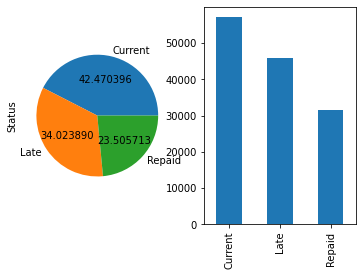

In [97]:
plt.subplot(1,2,1)
df["Status"].value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,2,2)
df["Status"].value_counts().plot(kind="bar")
plt.show()

In [98]:
##create new target columns
new_df_=df[df["Status"]!="Current"]
new_df_

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,27/01/2020,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,11/06/2009 16:40,11/06/2009 16:40,0,0,115.0410,KARU,True,11/06/2009 16:40,16/06/2009,06/07/2010,27/07/2009,25/06/2010,25/06/2010,17,5,2.0,1,61,26/11/1947,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0,0,0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,True,1800.0000,319.0800,06/07/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,27/01/2020,978BB85B-1C69-4D51-8447-9C240104A3A2,654,10/06/2009 15:48,10/06/2009 15:48,0,0,140.6057,koort681,False,10/06/2009 15:48,15/06/2009,07/07/2009,15/07/2009,15/07/2009,15/07/2009,20,4,2.0,1,48,05/11/1960,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0,0,0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,True,2200.0000,45.8300,07/07/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,27/01/2020,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,05/06/2009 19:12,05/06/2009 19:12,0,0,319.5580,0ie,True,05/06/2009 19:12,15/06/2009,NaN,27/07/2009,25/02/2011,13/05/2014,20,6,2.0,1,58,13/11/1950,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0,0,0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,True,319.5409,197.2926,01/10/2012,2813.0,14/05/2012,2935.0,13/01/2012,NaN,NaN,NaN,NaN,16/07/2012,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,03/03/2016 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.00,0.00,116.35,414.07,0,0.0000,0.0000,0.0,0,NaN,NaN,NaN,NaN

In [99]:
new_df_["Target"]=np.where(new_df_["DefaultDate"].isnull(),0,1)

<AxesSubplot:>

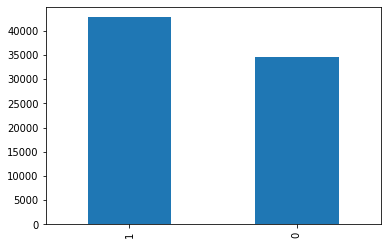

In [100]:
new_df_["Target"].value_counts().plot(kind="bar")

In [101]:
len(new_df_.columns)

113

In [102]:
feature_less_40_mv=new_df_.isnull().sum()[new_df_.isnull().sum()/len(new_df_)*100<40].index
len(feature_less_40_mv)

88

In [103]:
# to drop more than 40% missing value features
new_df=new_df_[feature_less_40_mv]
new_df

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,RecoveryStage,StageActiveSince,ModelVersion,Rating,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target
0,27/01/2020,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,11/06/2009 16:40,11/06/2009 16:40,0,0,115.0410,KARU,True,11/06/2009 16:40,16/06/2009,27/07/2009,25/06/2010,25/06/2010,17,5,2.0,1,61,26/11/1947,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,6000.0,0.0,0.0,0,0,0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,True,1800.0000,319.0800,06/07/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,0.0,0.00,NaN,0
1,27/01/2020,978BB85B-1C69-4D51-8447-9C240104A3A2,654,10/06/2009 15:48,10/06/2009 15:48,0,0,140.6057,koort681,False,10/06/2009 15:48,15/06/2009,15/07/2009,15/07/2009,15/07/2009,20,4,2.0,1,48,05/11/1960,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,8300.0,0.0,0.0,0,0,0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,True,2200.0000,45.8300,07/07/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,0.0,0.00,NaN,0
2,27/01/2020,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,05/06/2009 19:12,05/06/2009 19:12,0,0,319.5580,0ie,True,05/06/2009 19:12,15/06/2009,27/07/2009,25/02/2011,13/05/2014,20,6,2.0,1,58,13/11/1950,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,5000.0,0.0,0.0,0,0,0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,True,319.5409,197.2926,01/10/2012,2813.0,14/05/2012,2935.0,13/01/2012,NaN,NaN,NaN,NaN,116.35,NaN,03/03/2016 00:00,NaN,NaN,Late,True,180+,180+,NaN,203.1909,59.7626,0.00,0.00,116.35,414.07,0,0.0000,0.0000,0.0,0,0.0,0.00,180+,1
3,27/01/2020,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,13/06/2009 12:01,13/06/2009 12:01,0,0,57.5205,Alyona,True,13/06/2009 12:01,15/06/2009,15/07/2009,15/09/2010,15/09/2010,12,7,2.0,1,23,29/03/1986,1.0,EE,127.8233,57.5205,45.00,15,NaN,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11000.0,0.0,0.0,0,0,0,600.0,11600.0,0,0.00,0,0.00,0.00,15,True,900.0000,293.1000,15/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,31-60,NaN,57.5205,18.7323,0.00,0.00,0.00,0.00,1,134.2144,0.0000,0.0,0,0.0,0.00,NaN,0
4,27/01/2020,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,10/06/2009 10:17,10/06/2009 10:17,0,0,319.5582,Kai,True,10/06/2009 10:17,14/06/2009,27/07/2009,25/06/2010,25/06/2010,10,4,2.0,1,25,30/09/1983,1.0,EE,319.5582,319.5436,30.00,12,NaN,TARTU,TARTU,

In [104]:
new_df.isnull().sum()/len(new_df)*100

ReportAsOfEOD                              0.000000
LoanId                                     0.000000
LoanNumber                                 0.000000
ListedOnUTC                                0.000000
BiddingStartedOn                           0.000000
                                            ...    
PreviousEarlyRepaymentsCountBeforeLoan     0.000000
PrincipalDebtServicingCost                34.867044
InterestAndPenaltyDebtServicingCost       34.867044
ActiveLateLastPaymentCategory             35.709487
Target                                     0.000000
Length: 88, dtype: float64

In [105]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName',
       'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory',"LoanDate","FirstPaymentDate","MaturityDate_Original","MaturityDate_Last","LastPaymentOn","Status","County","City","InterestAndPenaltyWriteOffs","PrincipalWriteOffs","PrincipalDebtServicingCost","PreviousEarlyRepaymentsBefoleLoan","DebtOccuredOn","DebtOccuredOnForSecondary"]

In [106]:
new_df.drop(cols_del,axis=1,inplace=True)

In [107]:
new_df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,RecoveryStage,Rating,Restructured,ActiveLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target
0,0,0,115.0410,True,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,25,1800.0000,NaN,NaN,NaN,NaN,False,NaN,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0.0,NaN,0
1,0,0,140.6057,False,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,15,2200.0000,NaN,NaN,NaN,NaN,False,NaN,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0.0,NaN,0
2,0,0,319.5580,True,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,25,319.5409,2813.0,2935.0,NaN,NaN,True,180+,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,0.0,180+,1
3,0,0,57.5205,True,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,15,900.0000,NaN,NaN,NaN,NaN,False,NaN,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0.0,NaN,0
4,0,0,319.5582,True,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,25,5000.0000,NaN,3835.0,NaN,NaN,False,NaN,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0.0,180+,1


In [108]:
new_df.shape

(77394, 47)

In [109]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77349 non-null  float64
 5   LanguageCode                            77394 non-null  int64  
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77349 non-null  float64
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  f

In [110]:
num

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'VerificationType',
 'LanguageCode',
 'Age',
 'Gender',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'CurrentDebtDaysSecondary',
 'RecoveryStage',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'InterestAndPenaltyDebtServicingCost']

In [111]:
cata

['NewCreditCustomer',
 'Country',
 'EmploymentDurationCurrentEmployer',
 'Rating',
 'Restructured',
 'ActiveLateCategory',
 'CreditScoreEsMicroL',
 'ActiveLateLastPaymentCategory']

In [112]:
    new_df['VerificationType']=new_df['VerificationType'].replace({0.0:'not_set' ,1.0:'income_unverified',2.0:'income_unverified_cross-referenced_by_phone',
             3.0:'income_verified',4.0:'income_and_expenses_verified'})
    
    new_df['Gender']=new_df['Gender'].replace({0.0:'male', 1.0:'female', 2.0:'undefined'})
    
    new_df['LanguageCode']=new_df['LanguageCode'].replace({(21,22,15,13,10,7):'others',1:'estonian' ,2:'english', 3:'russian' ,4:'finnish' ,5:'german',6:'spanish', 9:'slovakian',})
    
    new_df['UseOfLoan']=new_df['UseOfLoan'].replace({-1:'Not_set',0.0:'loan_consolidation', 1.0:'real_estate', 
             2.0:'home_improvement', 3.0:'business', 4.0:'education', 5.0:'travel',
             6.0:'vehicle', 7.0:'other', 8.0:'health',
            101:'working_capital_financing', 102:'purchase_of_machinery_equipment', 
             103:'renovation_of_real_estate', 104:'accounts_receivable_financing',
            105:'acquisition_of_means_of_transport', 106:'construction_finance', 
             107:'acquisition_of_stocks', 108:'acquisition_of_real_estate',
            109:'guaranteeing_obligation', 110:'other_business'})
    
    new_df['MaritalStatus']=new_df['MaritalStatus'].replace({(np.nan,0.0,-1.0):'Not_specified',1.0:'married', 
             2.0:'cohabitant', 3.0:'single', 4.0:'divorced', 5.0:'widow'})
    
    new_df['Education']=new_df['Education'].replace({(0.0,-1.0):'Not_present',1.0:'primary_education', 2.0:'basic_education', 3.0:'vocational_education', 4.0:'secondary_education', 5.0:'higher_education'})
    
    new_df['EmploymentStatus']=new_df['EmploymentStatus'].replace({np.nan:'Not_specified',0.0:'Not_specified',-1.0:'Not_specified',1.0:'unemployed', 2.0:'partially_employed', 
             3.0:'fully_employed', 4.0:'self_employed', 5.0:'entrepreneur', 6.0:'retiree'})
    
    new_df['OccupationArea']=new_df['OccupationArea'].replace({np.nan:'Not_specified',0.0:'Not_specified',-1.0:'Not_specified',1.0:'other', 
             2.0:'mining', 3.0:'processing', 4.0:'energy', 5.0:'utilities', 
             6.0:'construction', 7.0:'retail_and_wholesale', 8.0:'transport_and_warehousing', 9.0:'hospitality_and_catering', 
             10.0:'info_and_telecom', 11.0:'finance_and_insurance', 12.0:'real_estate', 13.0:'research', 14:'administrative', 
             15:'civil_service_&_military', 16:'education', 17:'healthcare_and_social_help', 
             18:'art_and_entertainment', 19:'agriculture_forestry_and_fishing'})
    
    new_df['Restructured']=new_df['Restructured'].replace({True:'original_maturity_date_of_loan_increased', 
             False:'original_maturity_date_of_loan_not_increased'})
    
    new_df['NewCreditCustomer']=new_df['NewCreditCustomer'].replace({True:'no_prior_credit_history', False:'at_least_3_months_credit_history'})
    
    new_df['HomeOwnershipType']=new_df['HomeOwnershipType'].replace({np.nan:'Not_specified',-1.0:'Not_specified',0.0:'homeless ', 1.0:'owner' , 2.0:'living_with_parents', 3.0:'tenant_pre-furnished_property', 
             4.0:'tenant_unfurnished_property', 5.0:'council_house', 6.0:'joint_tenant', 7.0:'joint_ownership', 
             8.0:'mortgage', 9.0:'owner_with_encumbrance', 10.0:'other'})
    
    new_df['PrincipalBalance'].replace({(-34.2, -1.97, -11.81,-2.67,-1.27):np.nan} , inplace=True)
    
    new_df['Country']=new_df['Country'].replace({'EE':'estonia','FI':'finland' ,'ES':'spain', 'SK':'slovakia'})
    
    new_df["ActiveLateLastPaymentCategory"].replace({"01-Jul":"01-05","Aug-15":"06-15"},inplace=True)
    new_df["ActiveLateCategory"].replace({"01-Jul":"01-05","Aug-15":"06-15"},inplace=True)
    
    new_df["FreeCash"]=np.where(new_df["FreeCash"]<0,0,new_df["FreeCash"])
    new_df["InterestAndPenaltyBalance"]=np.where(new_df["InterestAndPenaltyBalance"]<0,0,new_df["InterestAndPenaltyBalance"])


In [113]:
new_df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,RecoveryStage,Rating,Restructured,ActiveLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target
0,0,0,115.0410,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,61,female,estonia,319.5582,115.0408,30.00,12,NaN,other,vocational_education,married,fully_employed,UpTo3Years,retail_and_wholesale,Not_specified,10500.0,0,0.00,0,0.00,0.00,25,1800.0000,NaN,NaN,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0.00,NaN,0
1,0,0,140.6057,at_least_3_months_credit_history,income_unverified_cross-referenced_by_phone,estonian,48,female,estonia,191.7349,140.6057,25.00,1,NaN,other,higher_education,divorced,fully_employed,MoreThan5Years,education,Not_specified,10800.0,0,0.00,0,0.00,0.00,15,2200.0000,NaN,NaN,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0.00,NaN,0
2,0,0,319.5580,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,58,female,estonia,319.5582,319.5409,25.00,20,NaN,home_improvement,secondary_education,married,fully_employed,UpTo4Years,hospitality_and_catering,Not_specified,7000.0,0,0.00,0,0.00,0.00,25,319.5409,2813.0,2935.0,NaN,NaN,original_maturity_date_of_loan_increased,180+,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,0.00,180+,1
3,0,0,57.5205,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,23,female,estonia,127.8233,57.5205,45.00,15,NaN,loan_consolidation,basic_education,single,Not_specified,UpTo2Years,other,Not_specified,11600.0,0,0.00,0,0.00,0.00,15,900.0000,NaN,NaN,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0.00,NaN,0
4,0,0,319.5582,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,25,female,estonia,319.5582,319.5436,30.00,12,NaN,vehicle,secondary_education,cohabitant,fully_employed,UpTo2Years,retail_and_wholesale,Not_specified,6800.0,0,0.00,0,0.00,0.00,25,5000.0000,NaN,3835.0,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0.00,180+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515,0,485.0000,no_prior_credit_history,income_verified,finnish,37,male,finland,3000.0000,3000.0000,31.01,60,107.68,loan_consolidation,vocational_education,single,fully_employed,MoreThan5Years,other,council_house,1400.0,1,500.00,0,7.69,792.32,1,1411.6000,1791.0,1791.0,2.0,E,original_maturity_date_of_loan_not_increased,180+,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,1040.06,180+,1
134525,1880,0,1120.0000,at_least_3_months_credit_history,income_verified,finnish,35,male,finland,3000.0000,3000.0000,18.25,60,85.33,home_improvement,vocational_education,single,fully_employed,MoreThan5Years,transport_and_warehousing,owner,2265.0,5,1777.46,0,31.58,520.67,7,0.0000,NaN,NaN,1.0,B,original_maturity_date_of_loan_not_increased,NaN,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,0.00,NaN,0
134526,1975,0,525.0000,no_prior_credit_history,income_unverified,finnish,40,male,finland,2500.0000,2500.0000,24.83,60,80.42,loan_cons

In [114]:
num=[i for i in new_df.columns if new_df[i].dtype=="float64" or new_df[i].dtype=="int64"]
cata=[i for i in new_df.columns if new_df[i].dtype=="object" or new_df[i].dtype=="bool"]

In [115]:
for i in cata:
    print(new_df[i].value_counts())
    print()

no_prior_credit_history             48867
at_least_3_months_credit_history    28527
Name: NewCreditCustomer, dtype: int64

income_and_expenses_verified                   41428
income_unverified                              25626
income_verified                                 8460
income_unverified_cross-referenced_by_phone     1827
not_set                                            8
Name: VerificationType, dtype: int64

estonian     33239
finnish      20302
spanish      16407
russian       6534
english        603
slovakian      293
others          11
german           5
Name: LanguageCode, dtype: int64

male         50697
female       20927
undefined     5725
Name: Gender, dtype: int64

estonia     39896
finland     20677
spain       16527
slovakia      294
Name: Country, dtype: int64

Not_set                            44177
other                               8926
home_improvement                    8102
loan_consolidation                  6419
vehicle                             28

In [116]:
def cat(cata,data):
    for i in cata:
        plt.subplot(1,2,1)
        sns.countplot(x=data[i])
        plt.subplot(1,2,2)
        data[i].value_counts().plot(kind="pie",autopct="%2f")
        plt.show()

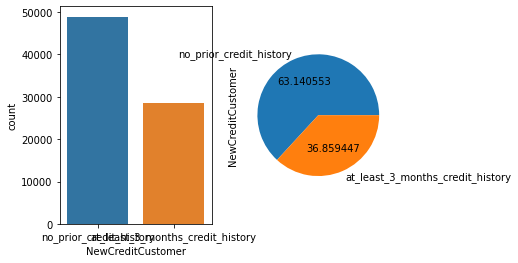

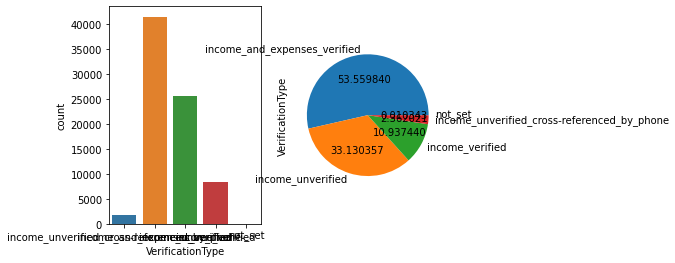

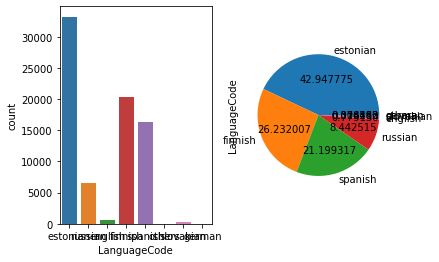

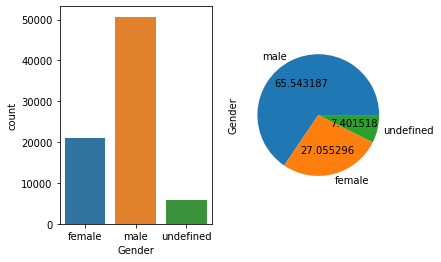

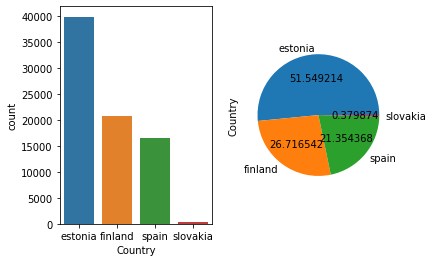

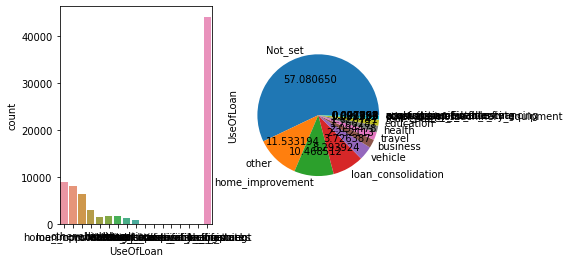

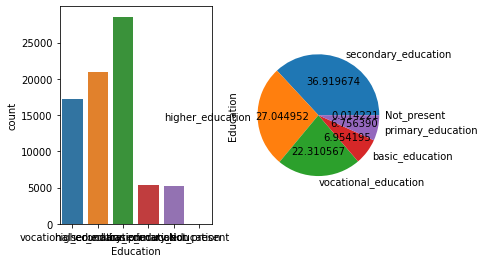

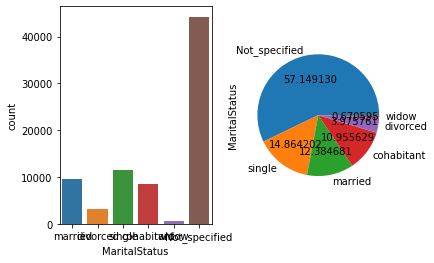

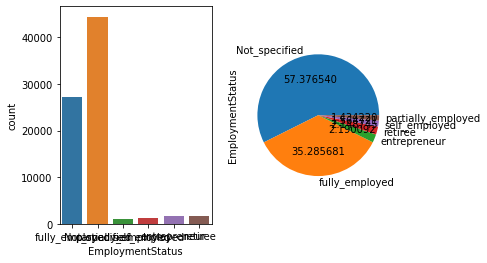

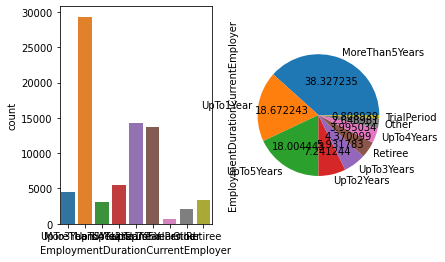

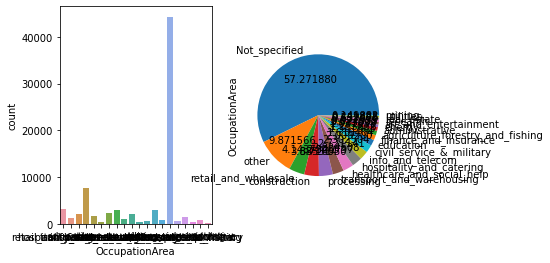

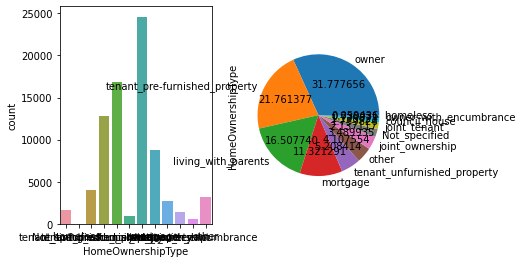

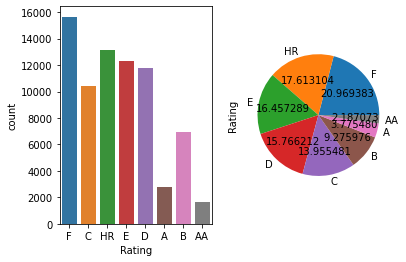

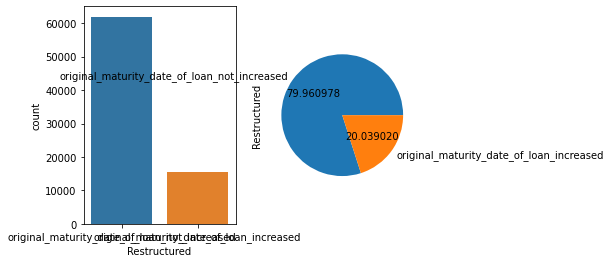

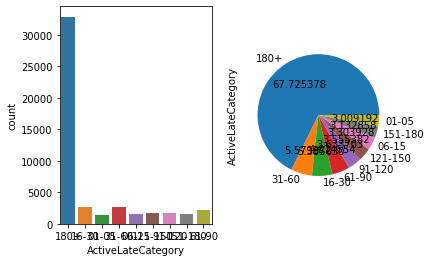

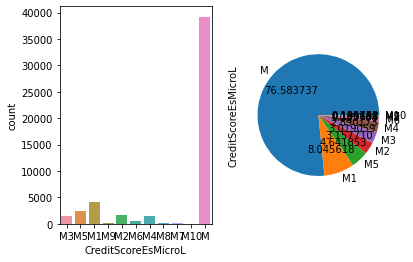

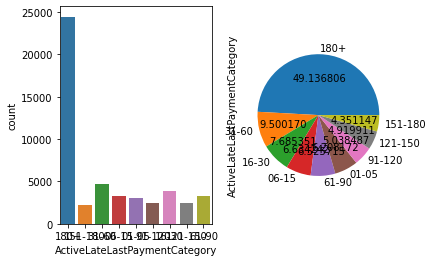

In [117]:
cat(cata,new_df)

In [121]:
def num_plot(num,df):
    for i in num:
        plt.subplot(1,2,1)
        sns.distplot(x=df[i])
        plt.subplot(1,2,2)
        sns.histplot(x=df[i],bins=30)
        plt.show()

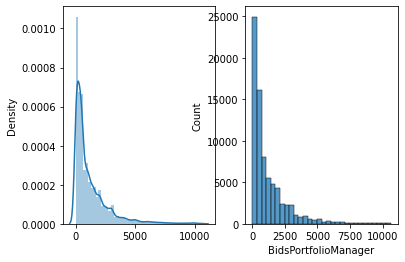

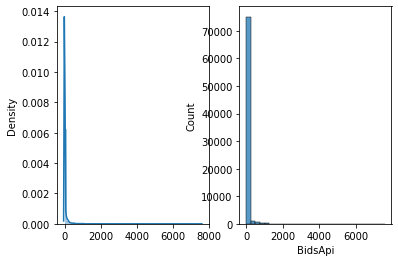

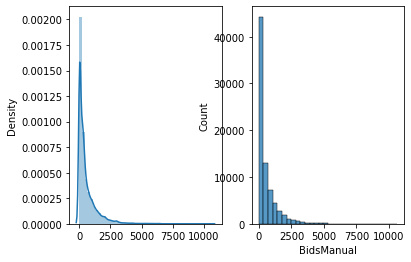

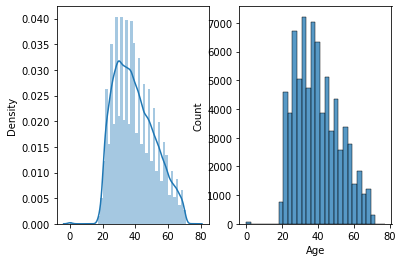

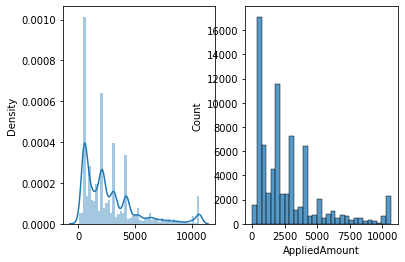

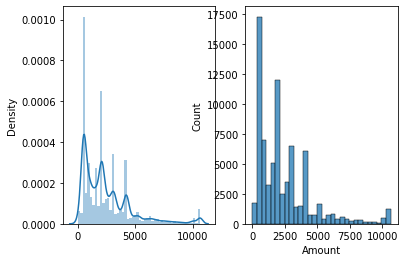

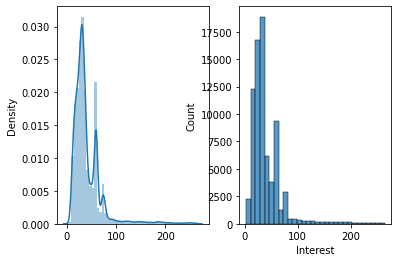

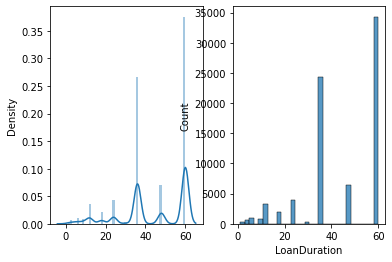

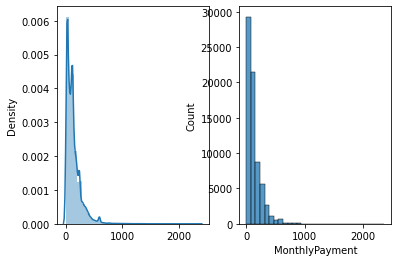

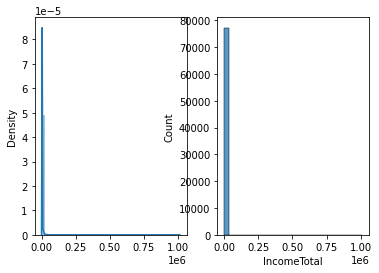

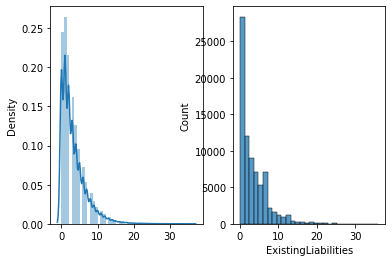

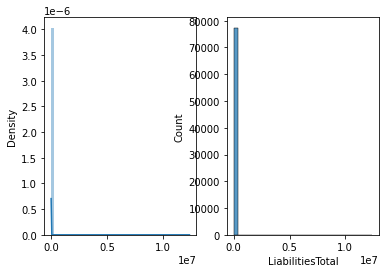

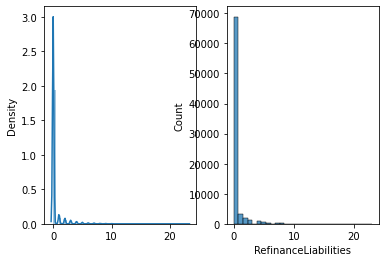

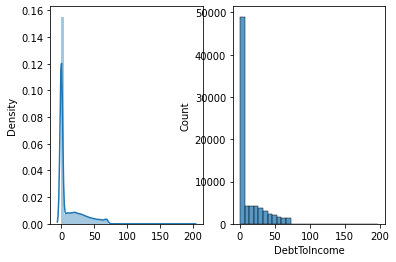

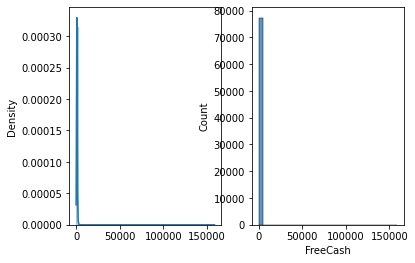

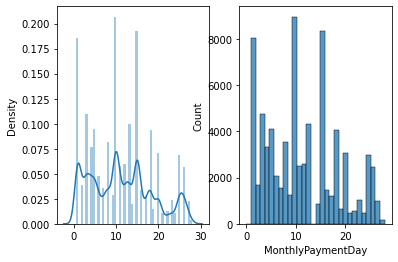

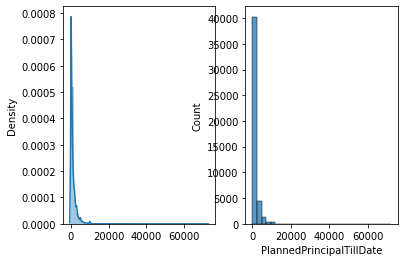

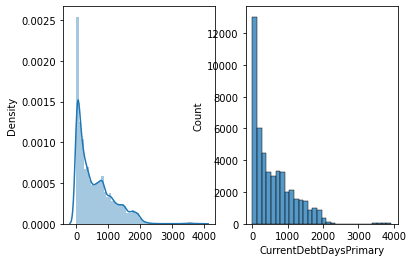

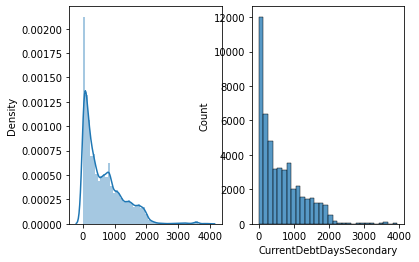

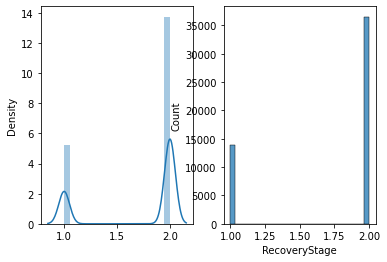

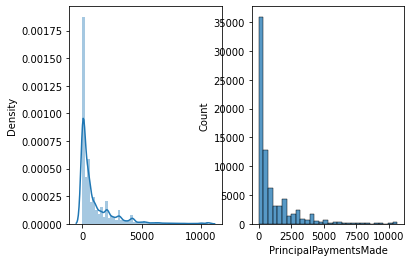

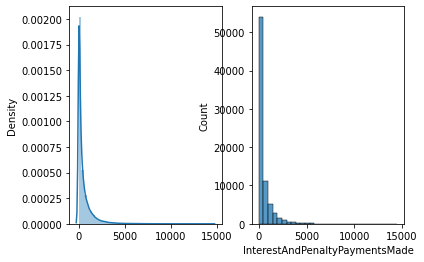

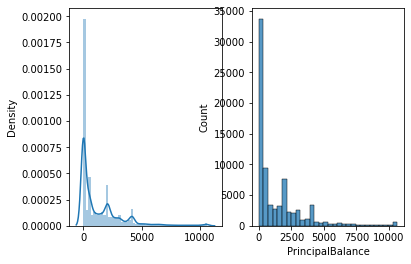

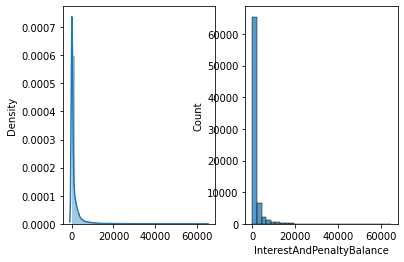

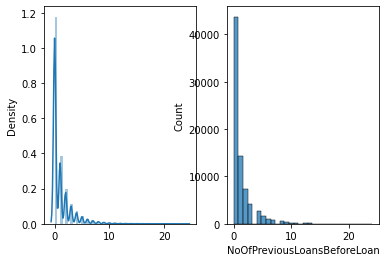

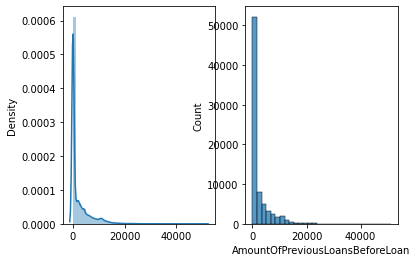

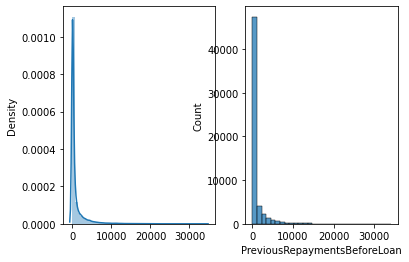

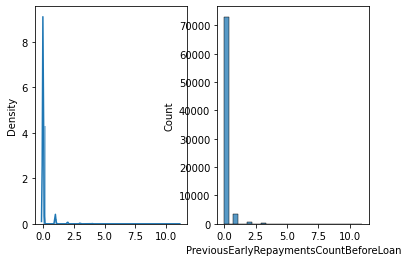

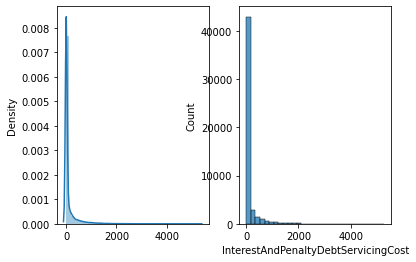

In [122]:
num_plot(num,new_df)

In [123]:
def cat_graph(column,data):
    sns.catplot(x="Target",col=column,kind="count",data=df1)
    plt.show()

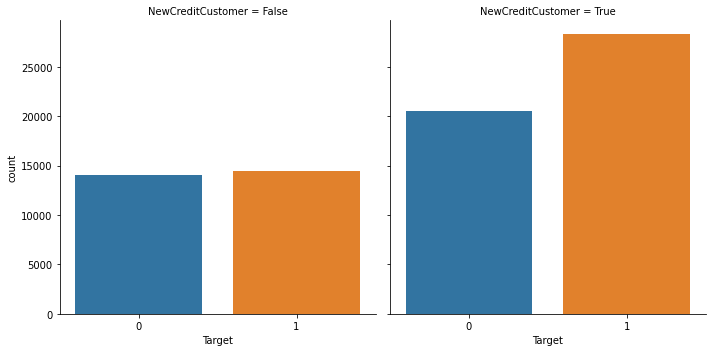

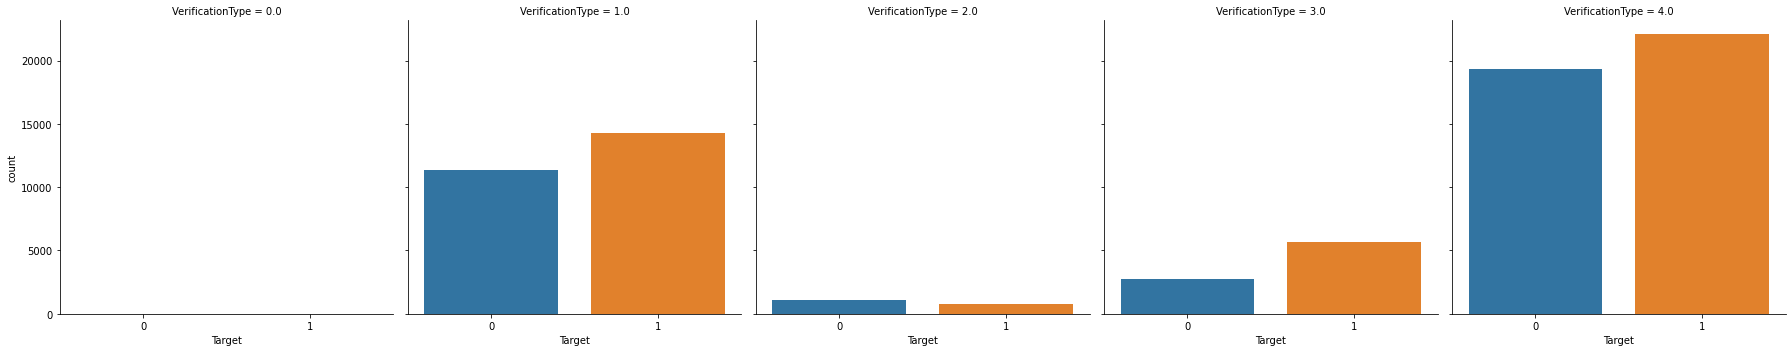

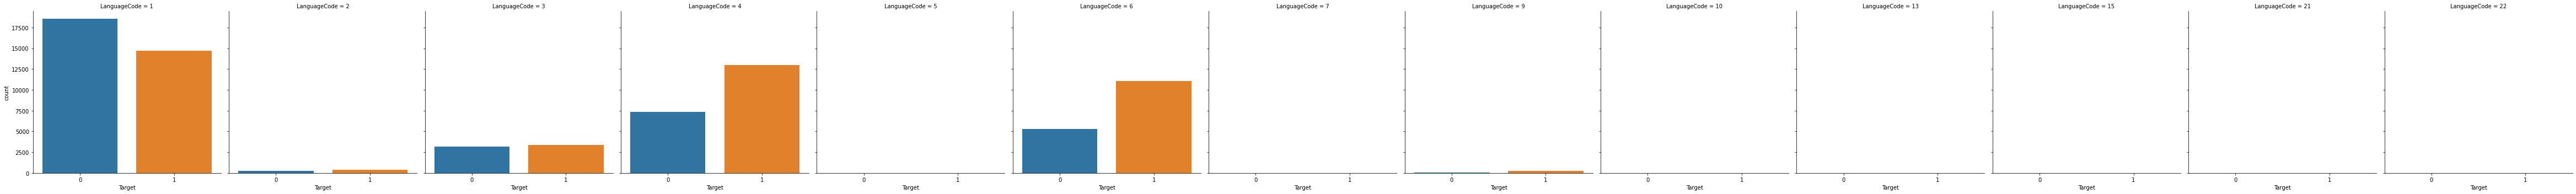

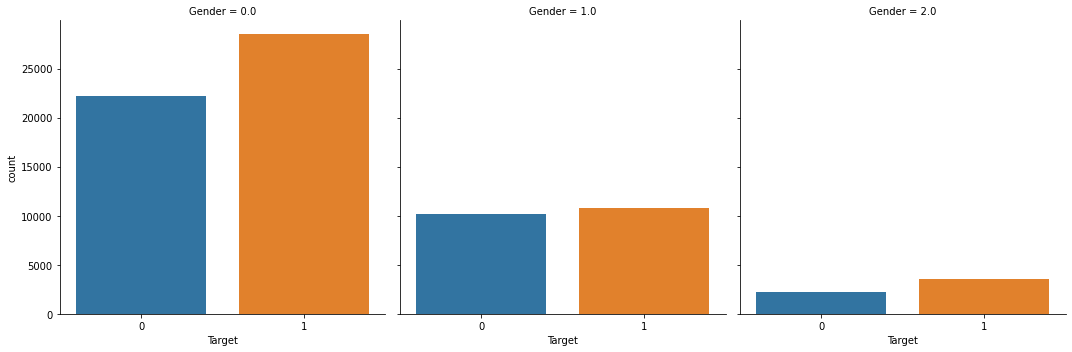

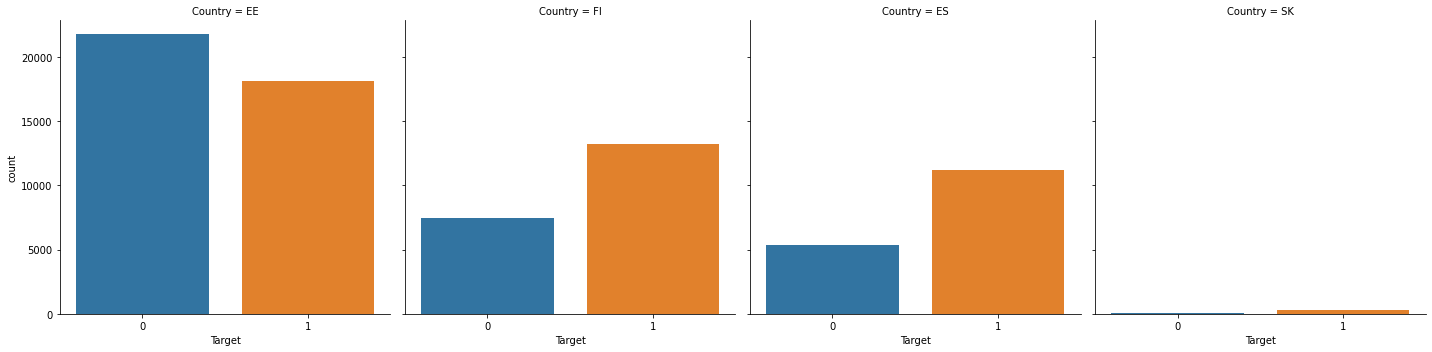

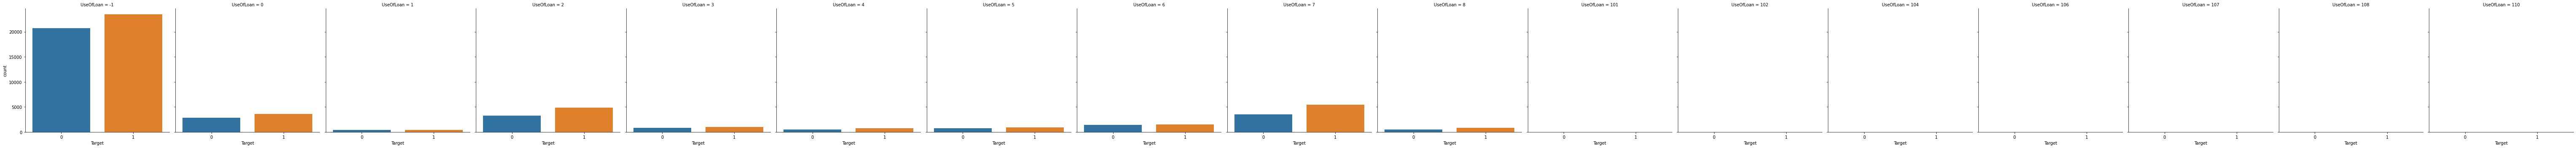

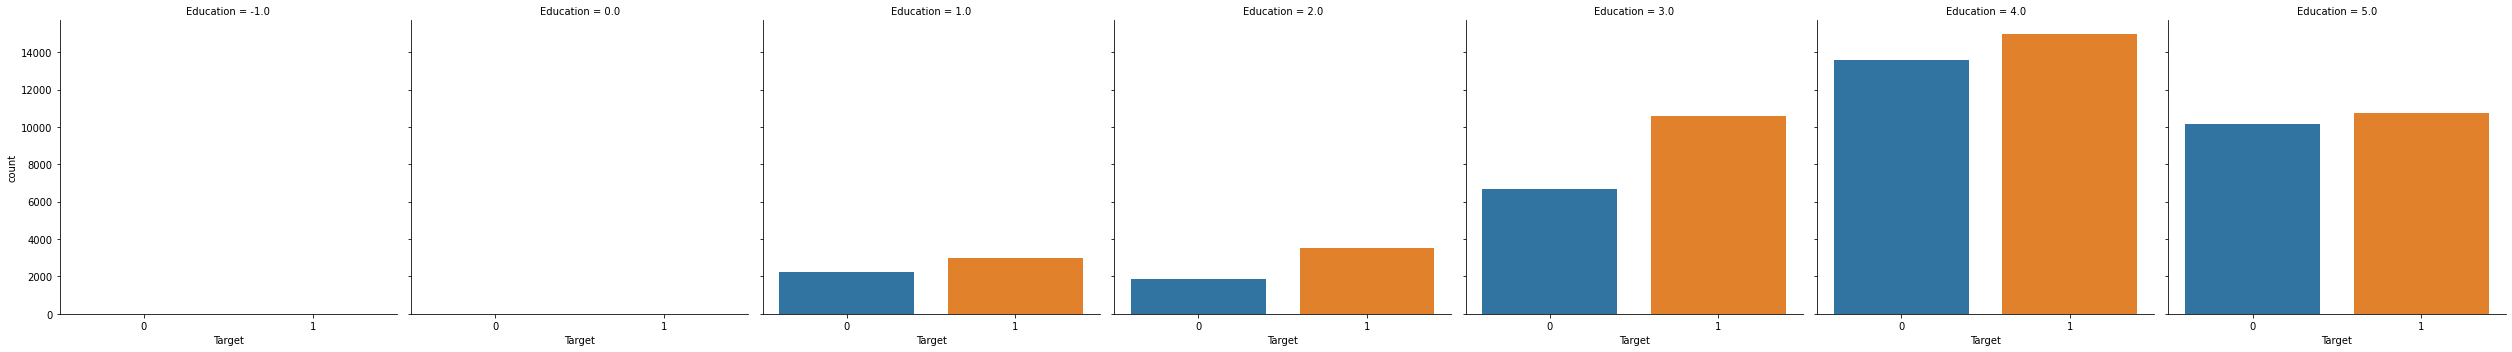

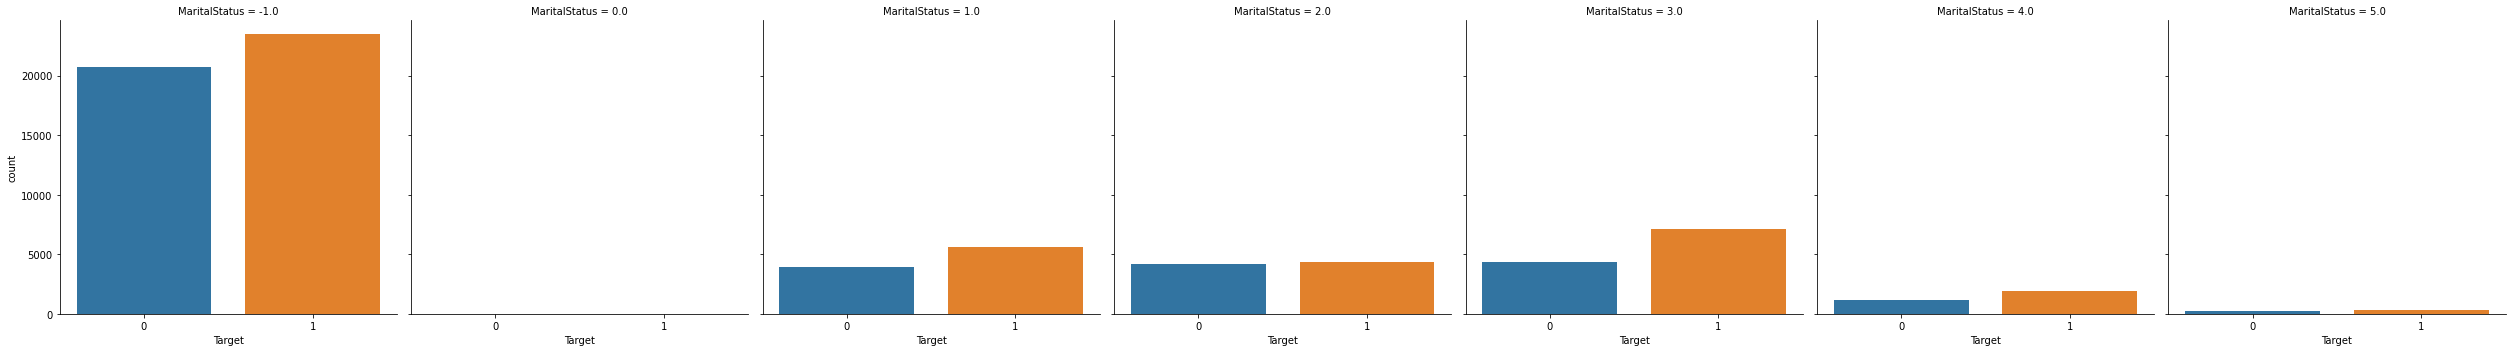

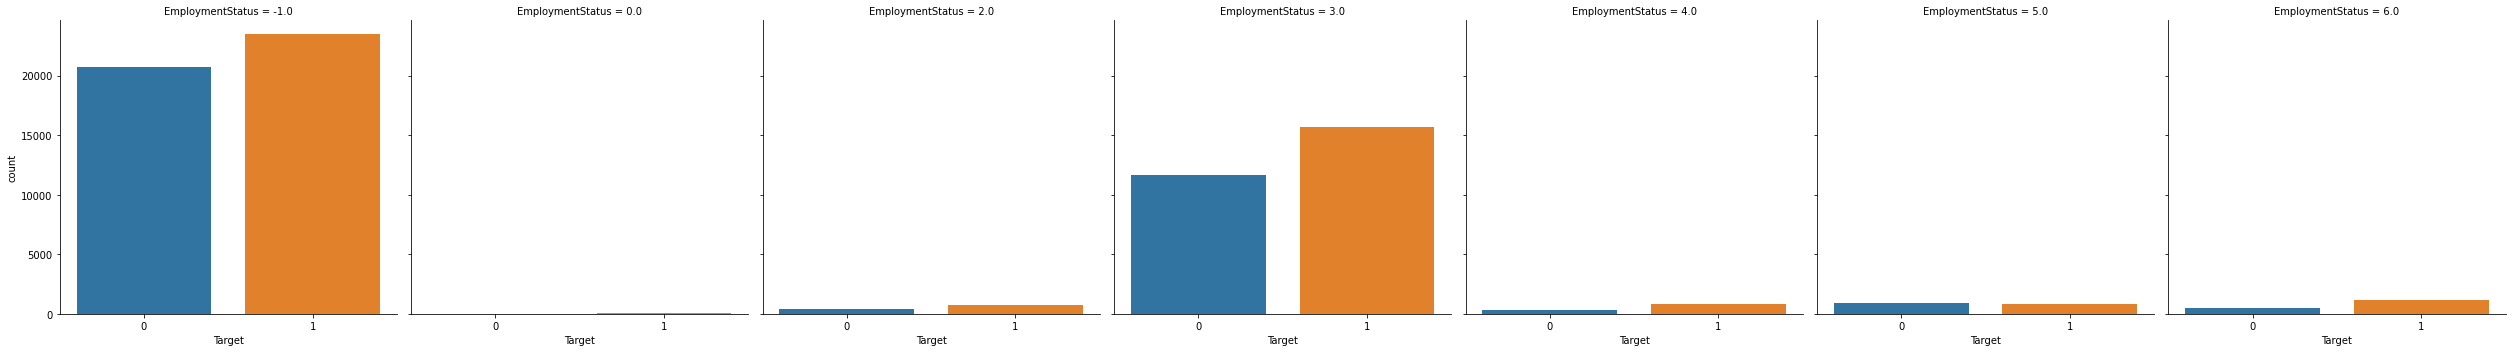

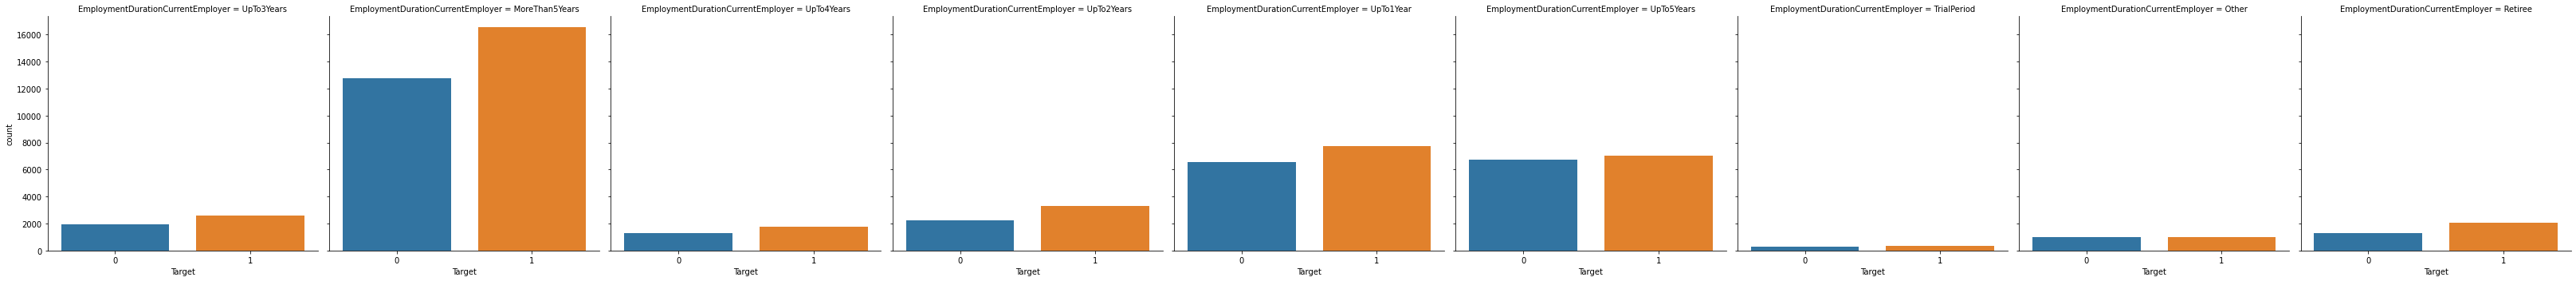

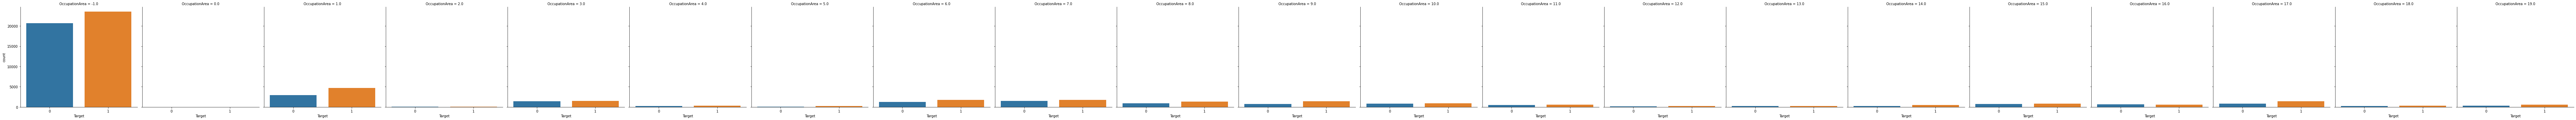

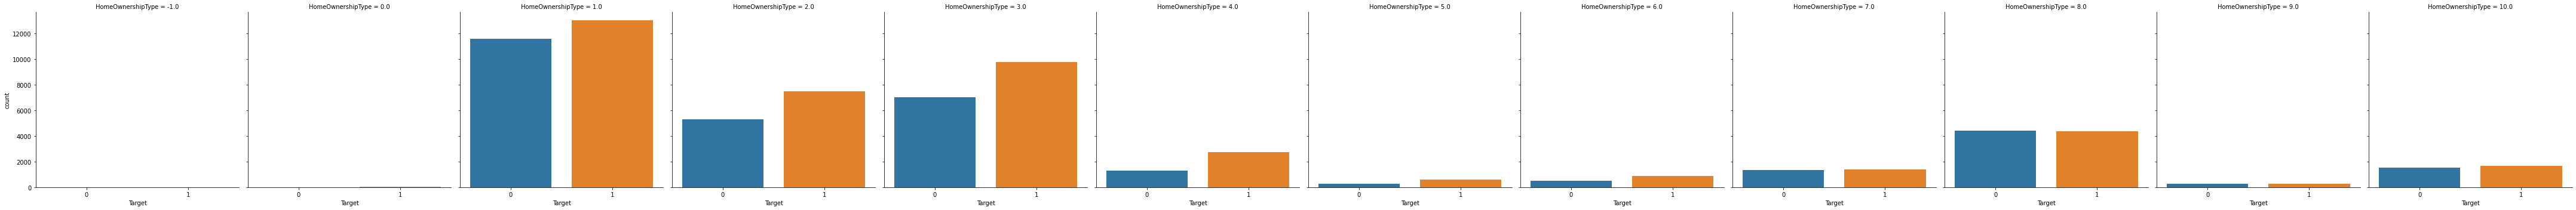

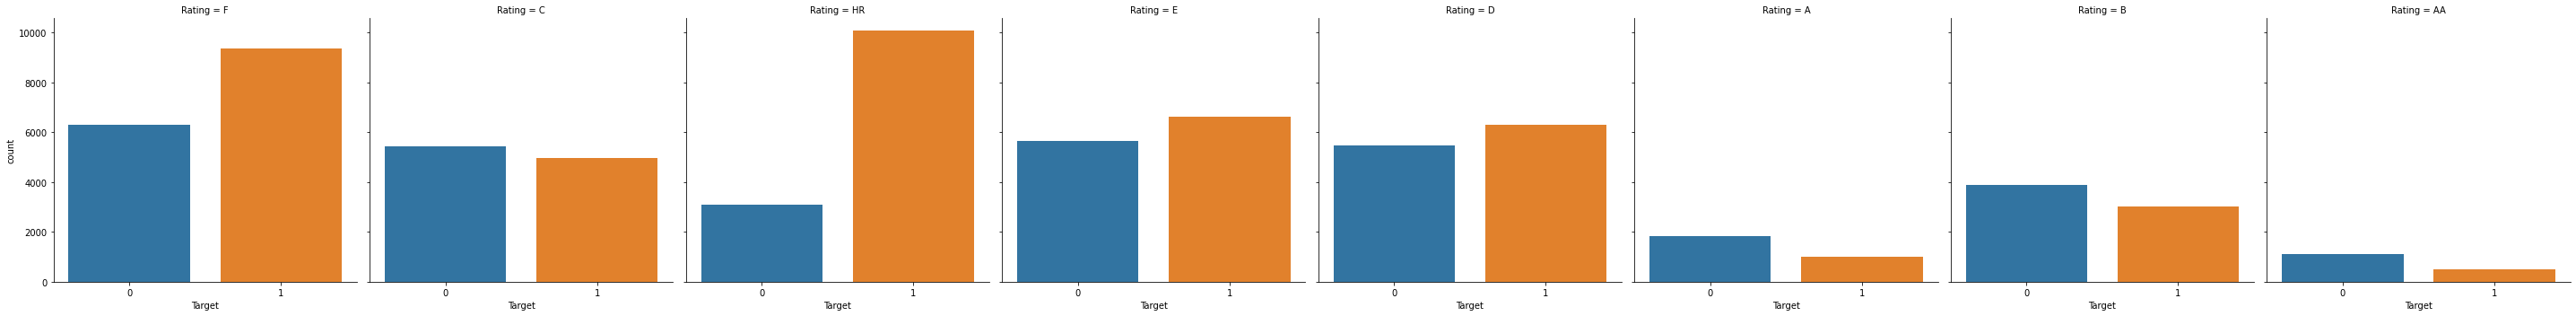

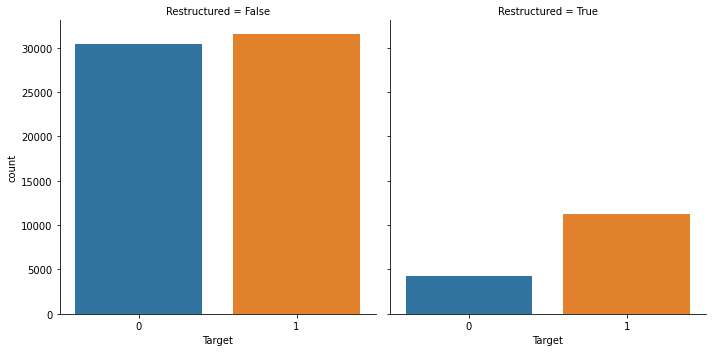

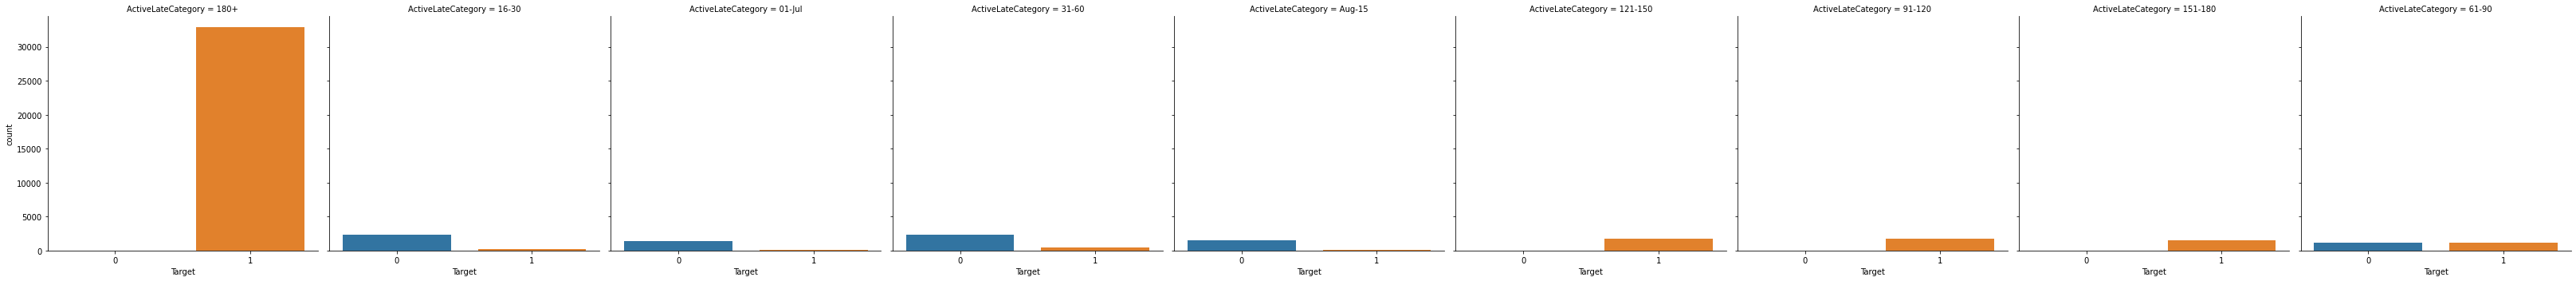

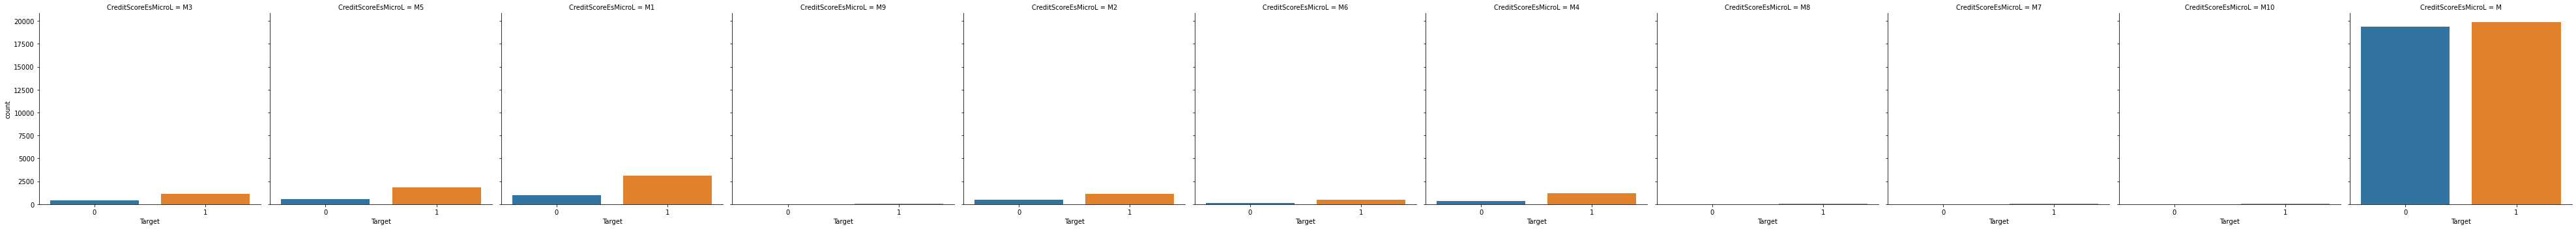

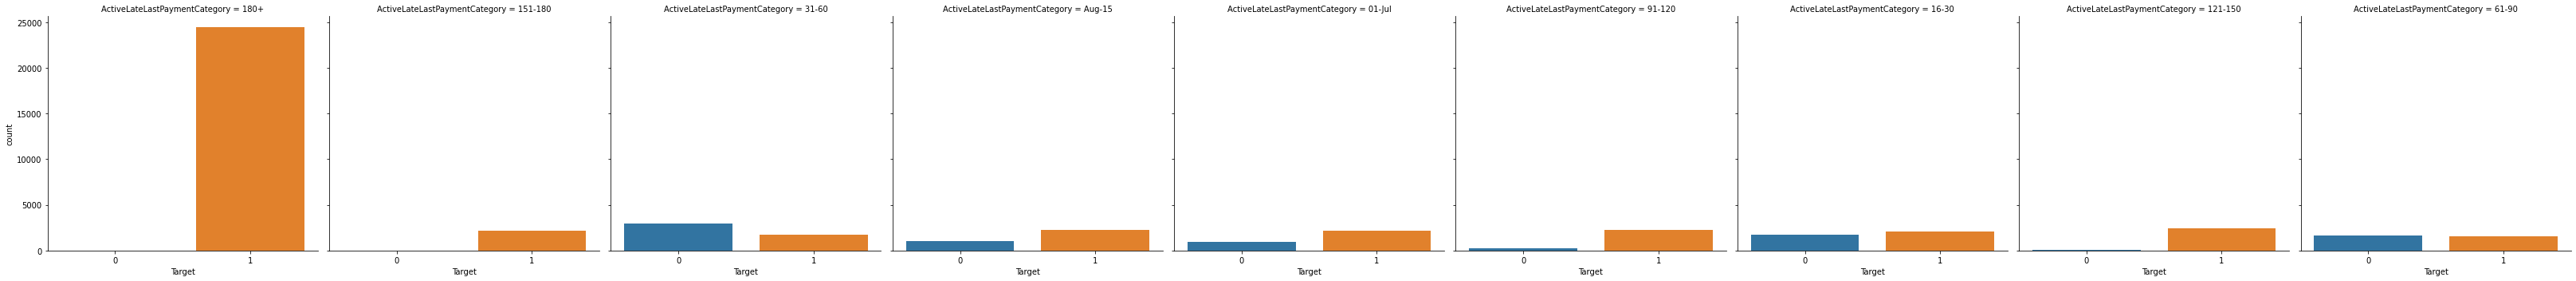

In [124]:
for i in cata:
    cat_graph(i,new_df)

In [125]:
def outlier(column,data):
    sns.boxplot(x=df1[column])
    plt.show()
    

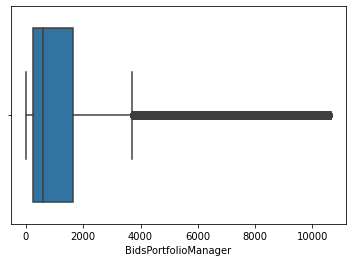

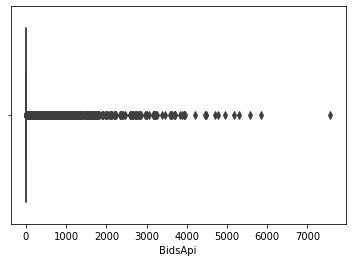

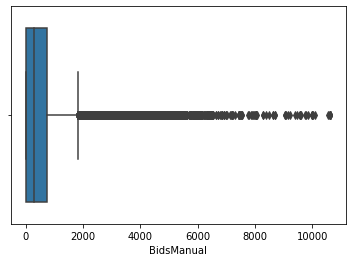

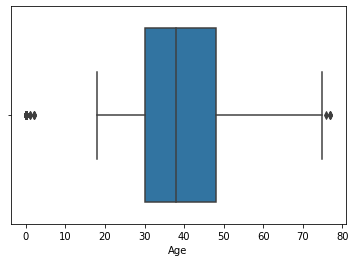

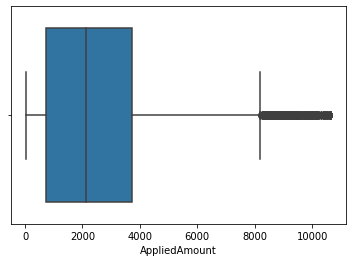

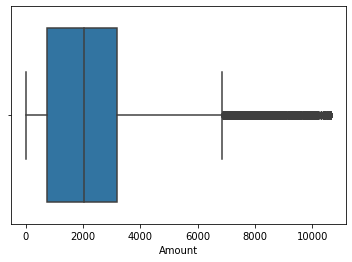

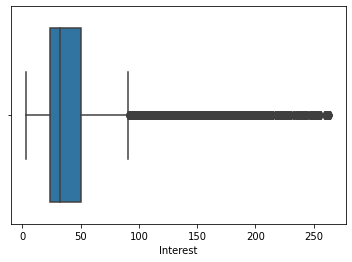

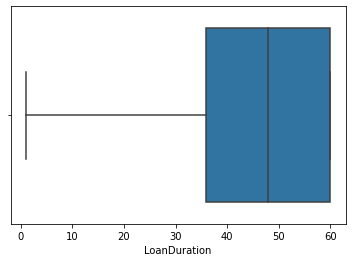

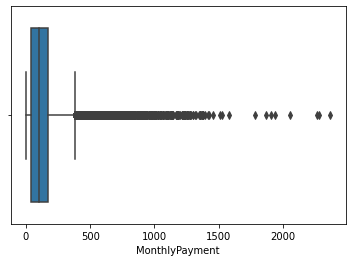

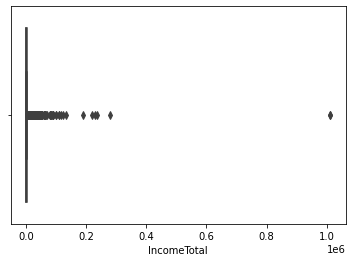

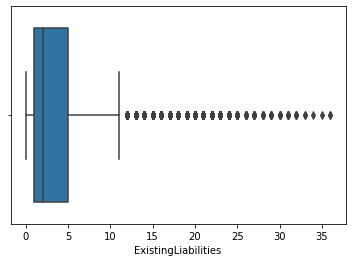

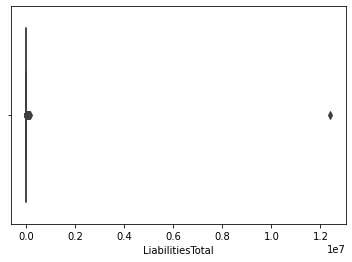

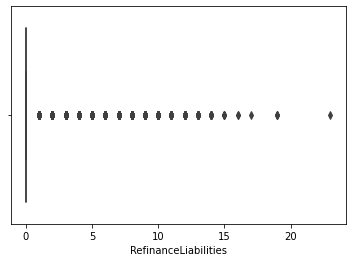

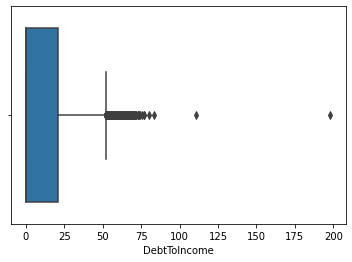

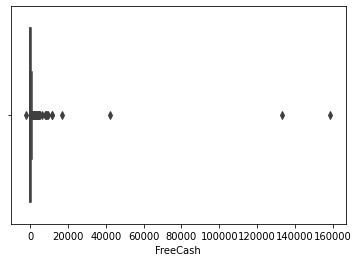

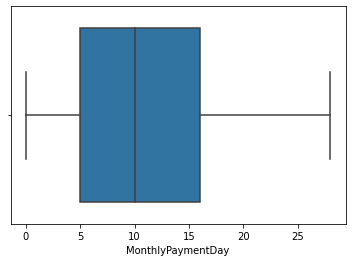

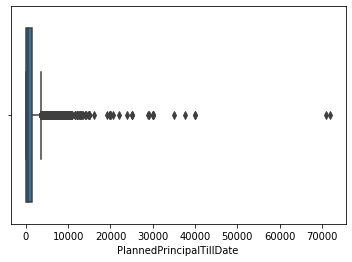

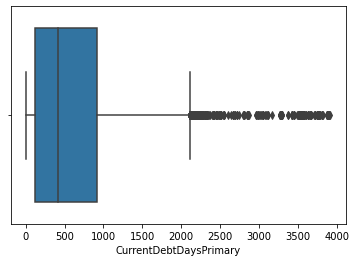

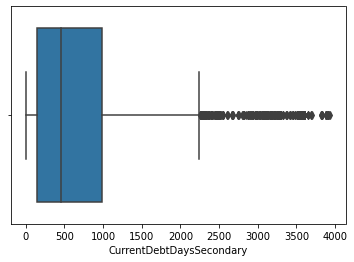

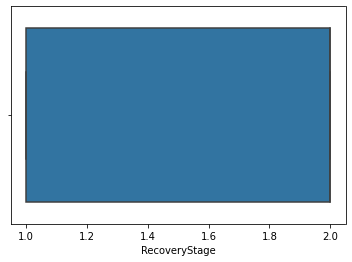

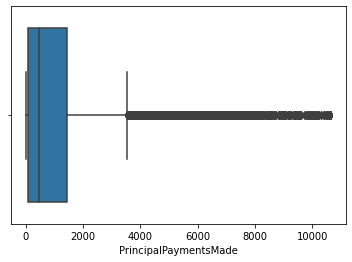

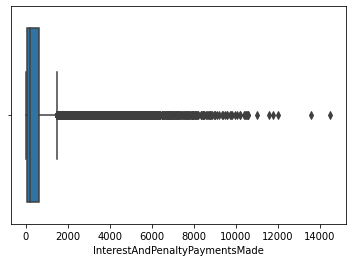

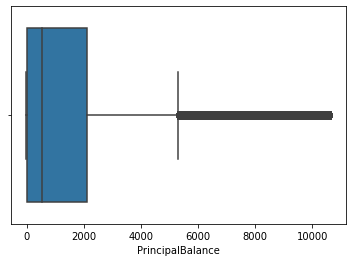

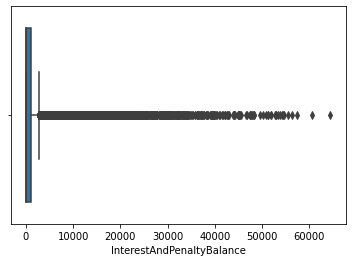

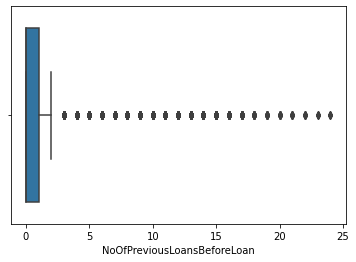

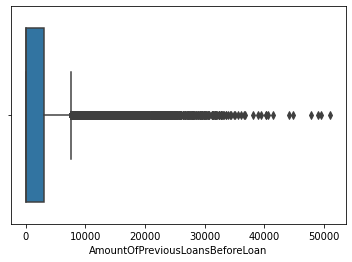

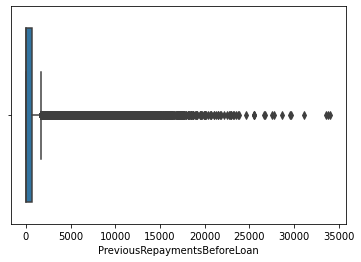

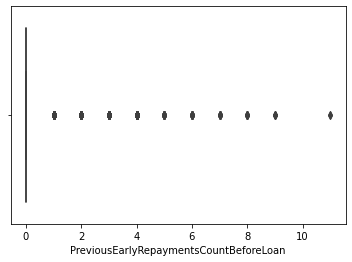

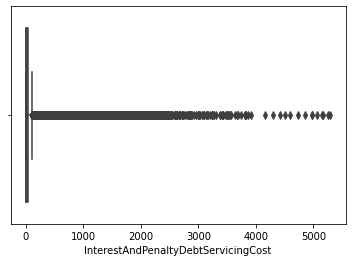

In [126]:
for i in num:
    outlier(i,df1)

In [127]:
def num_box(col,data):
    sns.boxplot(x="Target",y=col,data=df1)
    plt.show()

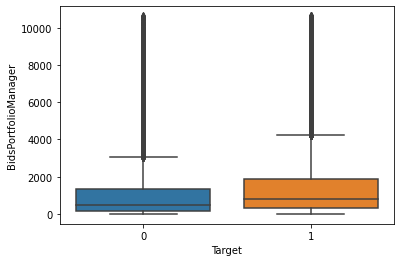

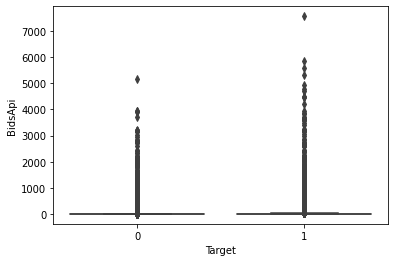

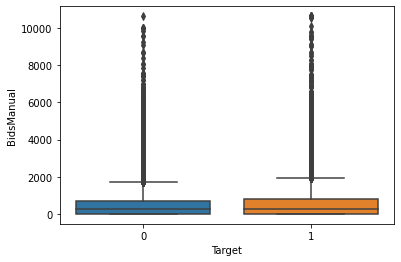

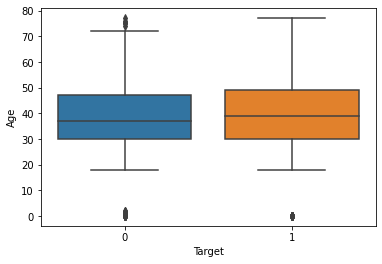

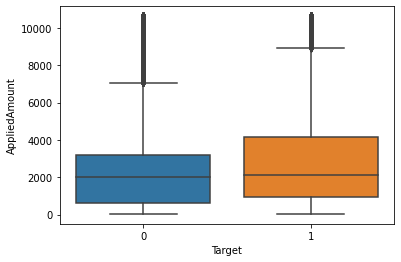

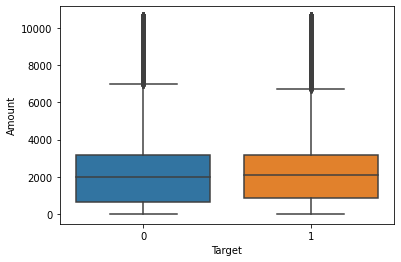

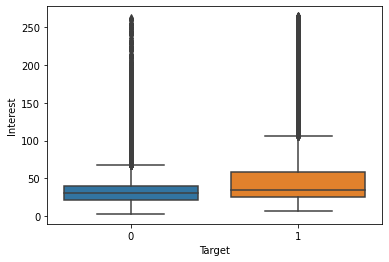

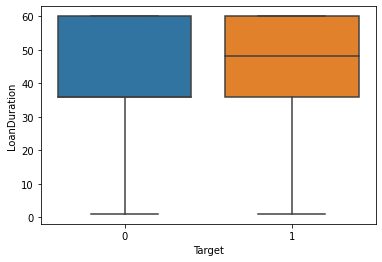

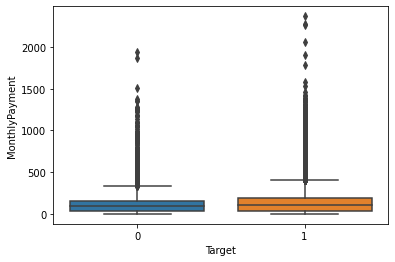

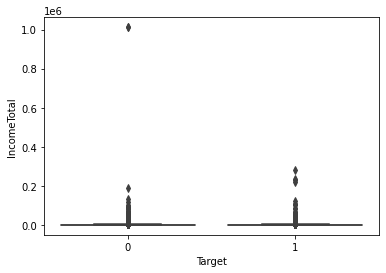

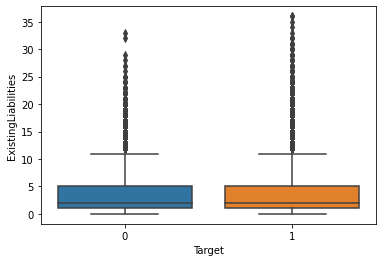

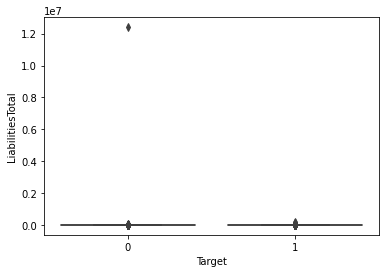

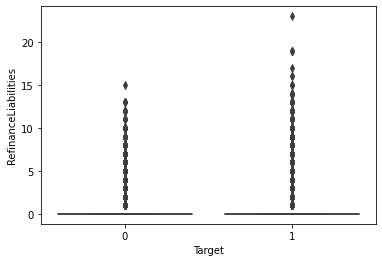

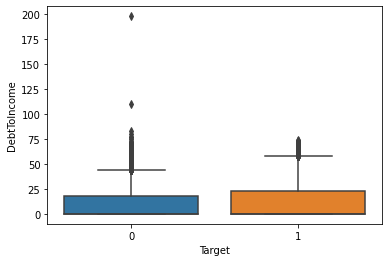

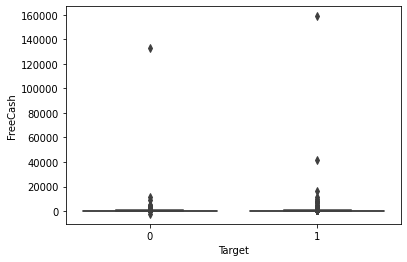

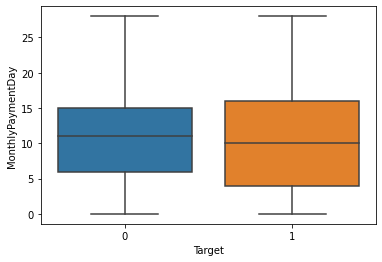

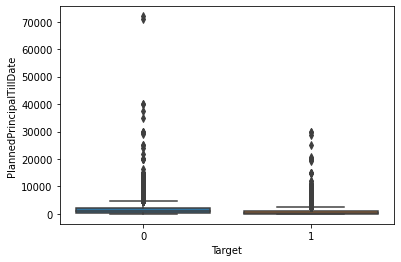

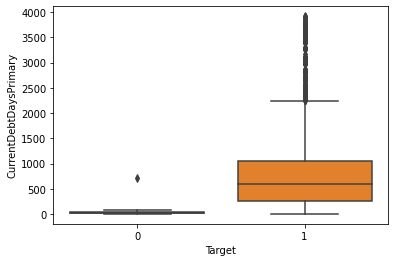

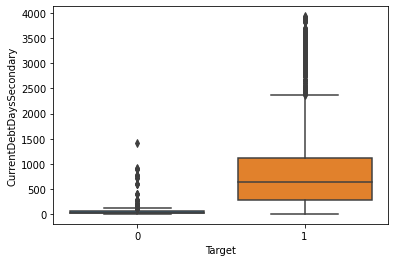

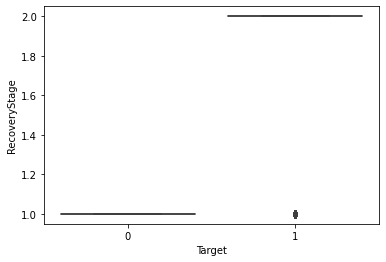

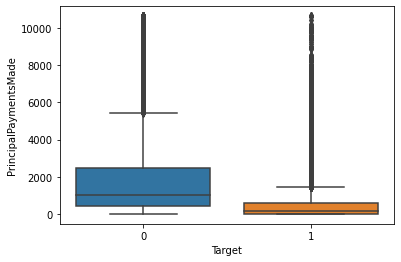

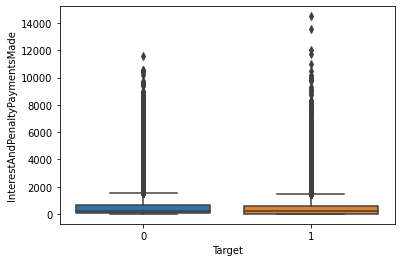

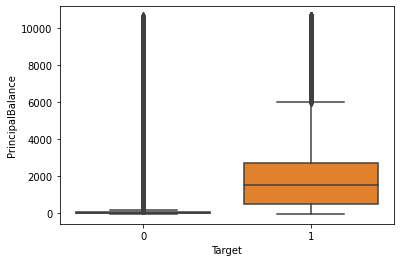

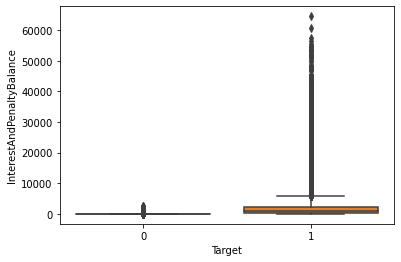

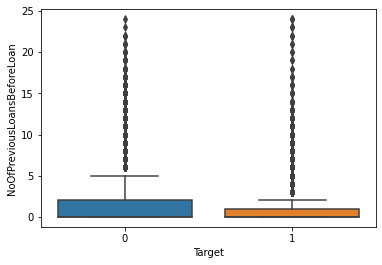

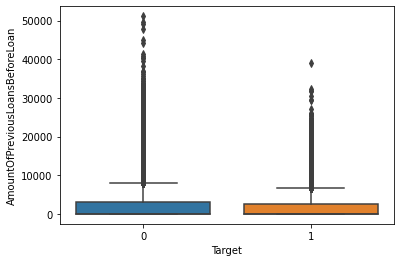

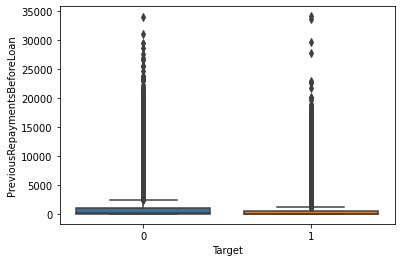

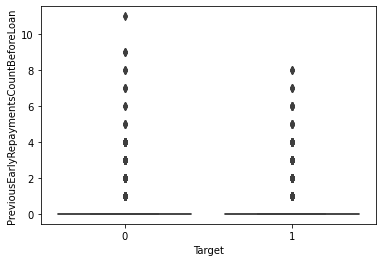

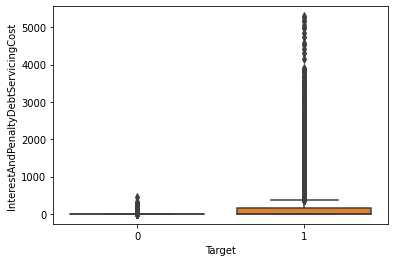

In [129]:
for i in num:
    num_box(i,new_df)
    plt.show()

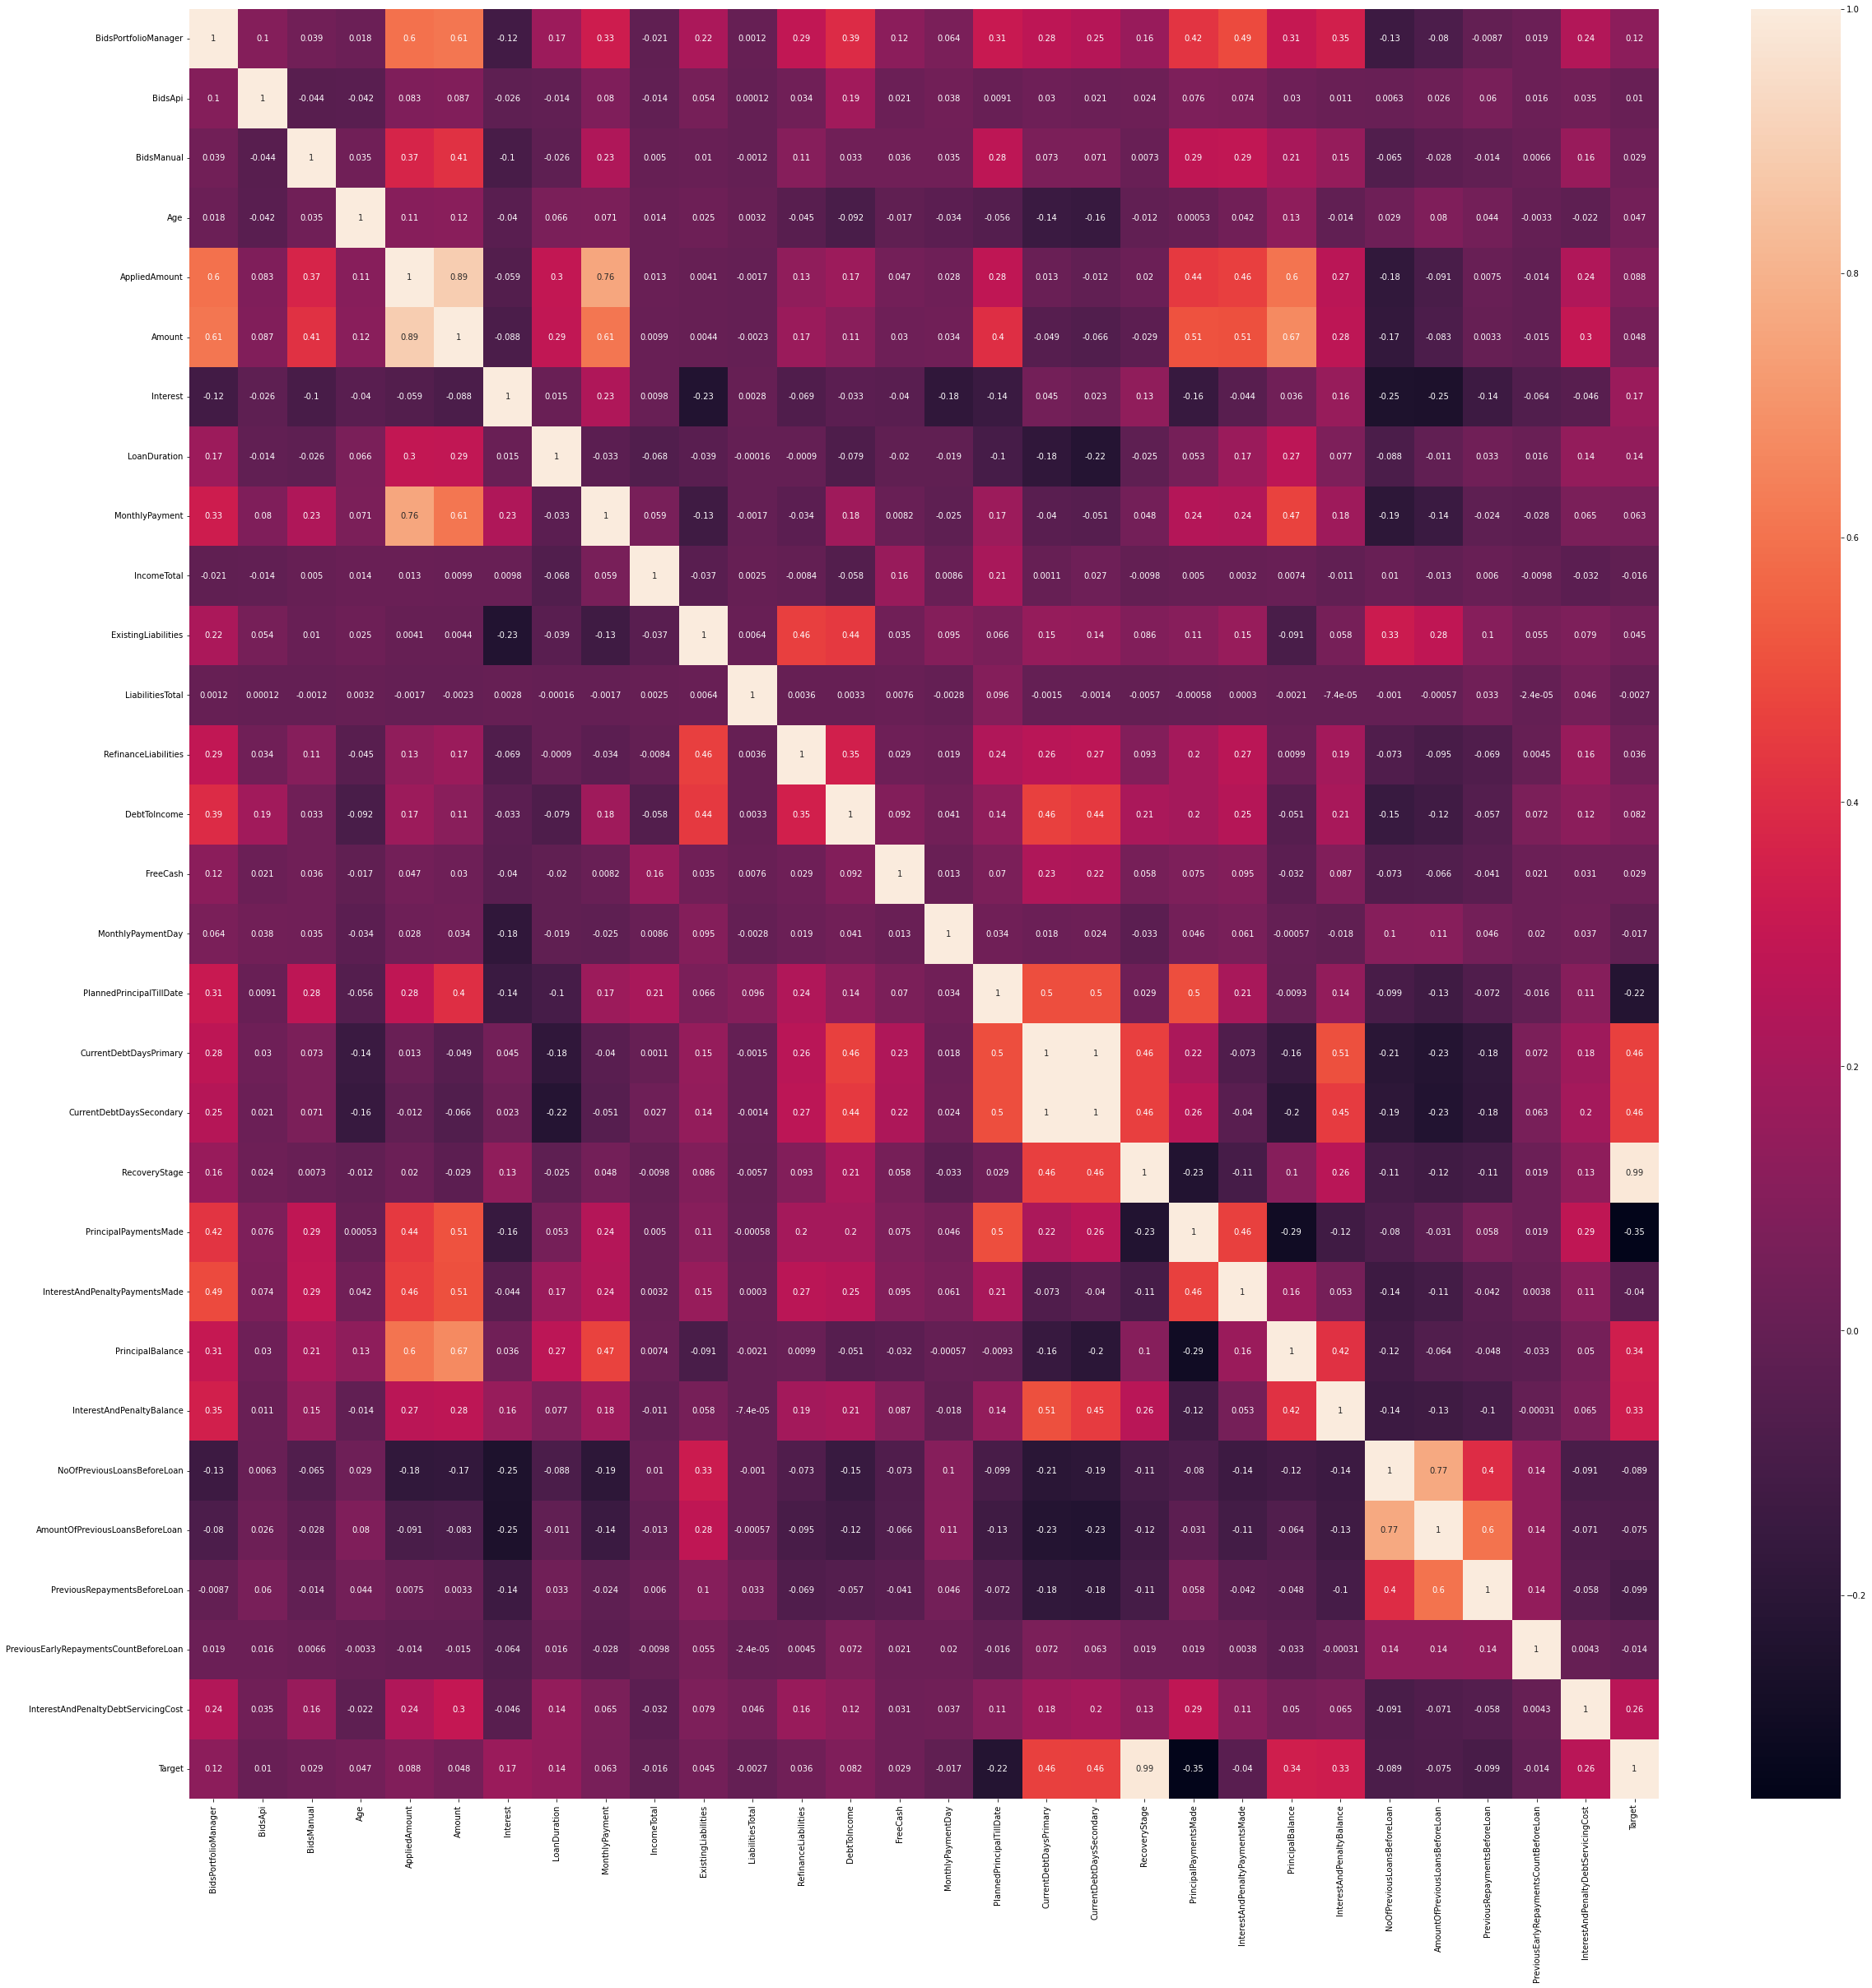

In [132]:
cor=new_df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(cor,annot=True)
plt.show()

In [133]:
##### Feature engg
new_df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,RecoveryStage,Rating,Restructured,ActiveLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target
0,0,0,115.0410,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,61,female,estonia,319.5582,115.0408,30.00,12,NaN,other,vocational_education,married,fully_employed,UpTo3Years,retail_and_wholesale,Not_specified,10500.0,0,0.00,0,0.00,0.00,25,1800.0000,NaN,NaN,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0.00,NaN,0
1,0,0,140.6057,at_least_3_months_credit_history,income_unverified_cross-referenced_by_phone,estonian,48,female,estonia,191.7349,140.6057,25.00,1,NaN,other,higher_education,divorced,fully_employed,MoreThan5Years,education,Not_specified,10800.0,0,0.00,0,0.00,0.00,15,2200.0000,NaN,NaN,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0.00,NaN,0
2,0,0,319.5580,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,58,female,estonia,319.5582,319.5409,25.00,20,NaN,home_improvement,secondary_education,married,fully_employed,UpTo4Years,hospitality_and_catering,Not_specified,7000.0,0,0.00,0,0.00,0.00,25,319.5409,2813.0,2935.0,NaN,NaN,original_maturity_date_of_loan_increased,180+,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,0.00,180+,1
3,0,0,57.5205,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,23,female,estonia,127.8233,57.5205,45.00,15,NaN,loan_consolidation,basic_education,single,Not_specified,UpTo2Years,other,Not_specified,11600.0,0,0.00,0,0.00,0.00,15,900.0000,NaN,NaN,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0.00,NaN,0
4,0,0,319.5582,no_prior_credit_history,income_unverified_cross-referenced_by_phone,estonian,25,female,estonia,319.5582,319.5436,30.00,12,NaN,vehicle,secondary_education,cohabitant,fully_employed,UpTo2Years,retail_and_wholesale,Not_specified,6800.0,0,0.00,0,0.00,0.00,25,5000.0000,NaN,3835.0,NaN,NaN,original_maturity_date_of_loan_not_increased,NaN,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0.00,180+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515,0,485.0000,no_prior_credit_history,income_verified,finnish,37,male,finland,3000.0000,3000.0000,31.01,60,107.68,loan_consolidation,vocational_education,single,fully_employed,MoreThan5Years,other,council_house,1400.0,1,500.00,0,7.69,792.32,1,1411.6000,1791.0,1791.0,2.0,E,original_maturity_date_of_loan_not_increased,180+,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,1040.06,180+,1
134525,1880,0,1120.0000,at_least_3_months_credit_history,income_verified,finnish,35,male,finland,3000.0000,3000.0000,18.25,60,85.33,home_improvement,vocational_education,single,fully_employed,MoreThan5Years,transport_and_warehousing,owner,2265.0,5,1777.46,0,31.58,520.67,7,0.0000,NaN,NaN,1.0,B,original_maturity_date_of_loan_not_increased,NaN,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,0.00,NaN,0
134526,1975,0,525.0000,no_prior_credit_history,income_unverified,finnish,40,male,finland,2500.0000,2500.0000,24.83,60,80.42,loan_cons

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [136]:

X=new_df.drop("Target",axis=1)
y=new_df["Target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=18)


In [138]:
for i in cata:
    X_train[i]=X_train[i].fillna(X_train[i].mode()[0])
    X_test[i]=X_test[i].fillna(X_test[i].mode()[0])
    

In [141]:
for i in num:
    X_train[i]=X_train[i].fillna(X_train[i].median())
    X_test[i]=X_test[i].fillna(X_test[i].median())
    

In [161]:
## outlier removal
def outlie_imput(num,data):
    for col in num:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        e_low = Q1 - 1.5 * IQR
        e_upp = Q3 + 1.5 * IQR
        data[col]=np.where(data[col]>e_upp,e_upp,data[col])
        data[col]=np.where(data[col]<e_low,e_low,data[col])
    return data[col]



In [163]:
outlie_imput(num,X_train)


125981    0.0
122470    0.0
7745      0.0
106168    0.0
73479     0.0
         ... 
105033    0.0
62595     0.0
1794      0.0
42004     0.0
82683     0.0
Name: InterestAndPenaltyDebtServicingCost, Length: 54175, dtype: float64

In [164]:
outlie_imput(num,X_test)

72993     0.0
21105     0.0
89855     0.0
114732    0.0
31126     0.0
         ... 
92660     0.0
88437     0.0
100939    0.0
127053    0.0
105146    0.0
Name: InterestAndPenaltyDebtServicingCost, Length: 23219, dtype: float64

In [166]:
num

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'Age',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'CurrentDebtDaysSecondary',
 'RecoveryStage',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'InterestAndPenaltyDebtServicingCost']

In [172]:
X_train

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,RecoveryStage,Rating,Restructured,ActiveLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
125981,0.0,0.0,900.0,no_prior_credit_history,income_unverified,estonian,25.0,female,estonia,900.0,900.0,35.00,60.0,36.0600,other,secondary_education,cohabitant,fully_employed,UpTo2Years,info_and_telecom,joint_tenant,500.0,2.0,400.00,0.0,37.21,63.94,1.0,311.4600,419.0,466.0,2.0,E,original_maturity_date_of_loan_not_increased,180+,M,900.00,825.60000,0.00,0.0000,0.0,0.0,0.000,0.0,0.0,180+
122470,135.0,0.0,600.0,no_prior_credit_history,income_and_expenses_verified,spanish,36.0,undefined,spain,2126.0,2126.0,72.87,60.0,113.3100,Not_set,secondary_education,Not_specified,Not_specified,UpTo5Years,Not_specified,mortgage,1283.0,0.0,0.00,0.0,0.00,0.00,3.0,530.0000,23.0,23.0,2.0,F,original_maturity_date_of_loan_not_increased,16-30,M,6.85,26.56000,2119.15,99.3100,0.0,0.0,40.340,0.0,0.0,31-60
7745,1690.0,0.0,220.0,no_prior_credit_history,income_unverified,spanish,33.0,male,spain,1910.0,1910.0,27.66,12.0,188.1500,other,secondary_education,married,fully_employed,UpTo4Years,hospitality_and_catering,tenant_pre-furnished_property,1290.0,5.0,789.00,0.0,45.75,312.85,7.0,1234.2375,419.0,466.0,2.0,D,original_maturity_date_of_loan_not_increased,180+,M1,1910.00,309.86000,0.00,0.0000,0.0,0.0,0.000,0.0,0.0,180+
106168,560.0,0.0,144.0,no_prior_credit_history,income_and_expenses_verified,finnish,70.0,male,finland,934.0,934.0,36.67,60.0,31.1400,Not_set,vocational_education,Not_specified,Not_specified,Retiree,Not_specified,tenant_pre-furnished_property,1350.0,6.0,468.41,0.0,0.00,0.00,4.0,530.0000,83.0,114.0,2.0,HR,original_maturity_date_of_loan_not_increased,61-90,M,15.57,8.01000,918.43,63.1200,1.0,3185.0,263.550,0.0,0.0,91-120
73479,1778.0,0.0,326.0,no_prior_credit_history,income_and_expenses_verified,finnish,62.0,male,finland,8190.0,6852.5,59.73,60.0,342.5825,Not_set,vocational_education,Not_specified,Not_specified,MoreThan5Years,Not_specified,owner,1750.0,0.0,0.00,0.0,0.00,0.00,3.0,530.0000,54.0,54.0,2.0,F,original_maturity_date_of_loan_increased,31-60,M,167.56,1475.79765,5279.95,1044.6200,0.0,0.0,40.340,0.0,0.0,61-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105033,56.0,0.0,280.0,no_prior_credit_history,income_and_expenses_verified,spanish,26.0,male,spain,2126.0,2126.0,75.64,60.0,115.9000,Not_set,higher_education,Not_specified,Not_specified,Other,Not_specified,living_with_parents,1200.0,0.0,0.00,0.0,0.00,0.00,4.0,530.0000,419.0,466.0,2.0,F,original_maturity_date_of_loan_not_increased,180+,M,2126.00,432.10000,0.00,0.0000,0.0,0.0,40.340,0.0,0.0,180+
62595,49.0,0.0,57.0,no_prior_credit_history,income_and_expenses_verified,finnish,28.0,male,finland,2125.0,2125.0,59.73,60.0,118.9200,Not_set,higher_education,Not_specified,Not_specified,UpTo5Years,Not_specified,tenant_pre-furnished_property,3270.0,7.0,1667.52,0.0,0.00,0.00,4.0,530.0000,387.0,387.0,2.0,HR,original_maturity_date_of_loan_not_increased,180+,M,6.06,130.45000,2118.94,1473.0000,0.0,0.0,40.340,0.0,0.0,180+
1794,425.0,0.0,575.0,no_prior_credit_history,income_unverified,spanish,60.0,male,spain,1000.0,1000.0,90.53,36.0,86.2600,other,basic_education,

In [175]:
from sklearn.preprocessing import LabelEncoder

In [181]:
def encoder(cata,data):
    label=LabelEncoder()
    for i in cata:
#         data[i]=data[i].replace({0.0:"OTHERS"})
        data[i]=label.fit_transform(data[i])
    return data[i]

In [183]:
encoder(cata,X_train)


125981    5
122470    6
7745      5
106168    8
73479     7
         ..
105033    5
62595     5
1794      5
42004     0
82683     5
Name: ActiveLateLastPaymentCategory, Length: 54175, dtype: int64

In [184]:
encoder(cata,X_test)

72993     0
21105     5
89855     0
114732    7
31126     5
         ..
92660     7
88437     7
100939    5
127053    4
105146    1
Name: ActiveLateLastPaymentCategory, Length: 23219, dtype: int32

In [185]:
X_train

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,RecoveryStage,Rating,Restructured,ActiveLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
125981,0.0,0.0,900.0,1,1,1,25.0,0,0,900.0,900.0,35.00,60.0,36.0600,9,4,1,2,5,11,4,500.0,2.0,400.00,0.0,37.21,63.94,1.0,311.4600,419.0,466.0,2.0,5,1,5,0,900.00,825.60000,0.00,0.0000,0.0,0.0,0.000,0.0,0.0,5
122470,135.0,0.0,600.0,1,0,7,36.0,2,3,2126.0,2126.0,72.87,60.0,113.3100,0,4,0,0,8,0,6,1283.0,0.0,0.00,0.0,0.00,0.00,3.0,530.0000,23.0,23.0,2.0,6,1,4,0,6.85,26.56000,2119.15,99.3100,0.0,0.0,40.340,0.0,0.0,6
7745,1690.0,0.0,220.0,1,1,7,33.0,1,3,1910.0,1910.0,27.66,12.0,188.1500,9,4,3,2,7,10,10,1290.0,5.0,789.00,0.0,45.75,312.85,7.0,1234.2375,419.0,466.0,2.0,4,1,5,1,1910.00,309.86000,0.00,0.0000,0.0,0.0,0.000,0.0,0.0,5
106168,560.0,0.0,144.0,1,0,2,70.0,1,1,934.0,934.0,36.67,60.0,31.1400,0,5,0,0,2,0,10,1350.0,6.0,468.41,0.0,0.00,0.00,4.0,530.0000,83.0,114.0,2.0,7,1,7,0,15.57,8.01000,918.43,63.1200,1.0,3185.0,263.550,0.0,0.0,8
73479,1778.0,0.0,326.0,1,0,2,62.0,1,1,8190.0,6852.5,59.73,60.0,342.5825,0,5,0,0,0,0,8,1750.0,0.0,0.00,0.0,0.00,0.00,3.0,530.0000,54.0,54.0,2.0,6,0,6,0,167.56,1475.79765,5279.95,1044.6200,0.0,0.0,40.340,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105033,56.0,0.0,280.0,1,0,7,26.0,1,3,2126.0,2126.0,75.64,60.0,115.9000,0,2,0,0,1,0,5,1200.0,0.0,0.00,0.0,0.00,0.00,4.0,530.0000,419.0,466.0,2.0,6,1,5,0,2126.00,432.10000,0.00,0.0000,0.0,0.0,40.340,0.0,0.0,5
62595,49.0,0.0,57.0,1,0,2,28.0,1,1,2125.0,2125.0,59.73,60.0,118.9200,0,2,0,0,8,0,10,3270.0,7.0,1667.52,0.0,0.00,0.00,4.0,530.0000,387.0,387.0,2.0,7,1,5,0,6.06,130.45000,2118.94,1473.0000,0.0,0.0,40.340,0.0,0.0,5
1794,425.0,0.0,575.0,1,1,7,60.0,1,3,1000.0,1000.0,90.53,36.0,86.2600,9,1,2,4,8,13,3,1468.0,2.0,960.00,0.0,41.30,421.74,25.0,1000.0000,419.0,1306.5,2.0,7,1,5,7,1000.00,174.64000,0.00,1394.2800,0.0,0.0,0.000,0.0,0.0,5
42004,1016.0,3.0,571.0,0,0,1,56.0,1,0,1590.0,1590.0,14.64,60.0,42.8300,0,4,0,0,4,0,10,1226.0,6.0,376.38,0.0,0.00,0.00,10.0,54.2400,261.0,291.0,2.0,2,1,5,0,384.94,246.43000,1205.06,93.6400,2.5,7115.0,916.475,0.0,0.0,0


In [187]:
X_test

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,RecoveryStage,Rating,Restructured,ActiveLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
72993,61.0,4.0,335.0,0,1,1,48.0,1,0,530.0,530.0,11.85,36.0,19.33,0,4,0,0,8,0,8,958.0,10.0,444.49,0.0,0.00,0.00,24.0,529.80,2.0,2.0,2.0,0,1,0,0,129.19,51.30,400.81,3.97,5.0,7437.5,128.170,0.0,0.0,0
21105,2530.0,12.5,5.0,0,1,1,61.0,0,0,3825.0,3825.0,31.48,36.0,178.24,8,4,3,2,8,17,8,803.0,11.0,1036.07,0.0,52.15,17.69,16.0,503.43,937.0,1014.0,2.0,5,0,5,0,282.75,177.29,3542.25,2659.90,3.0,7437.5,929.475,0.0,0.0,5
89855,112.0,0.0,288.0,0,1,1,60.0,1,0,530.0,530.0,20.19,48.0,17.96,0,1,0,0,8,0,8,450.0,7.0,282.62,0.0,0.00,0.00,16.0,529.80,4.0,4.0,2.0,3,1,0,0,43.15,52.29,486.85,8.21,5.0,7437.5,307.780,0.0,0.0,0
114732,25.0,0.0,95.0,1,0,7,18.0,2,3,531.0,531.0,72.79,60.0,28.30,0,4,0,0,4,0,5,1800.0,0.0,0.00,0.0,0.00,0.00,22.0,529.80,65.0,65.0,2.0,6,1,7,0,0.00,0.00,531.00,76.98,0.0,0.0,41.650,0.0,0.0,7
31126,663.0,0.0,77.0,0,0,1,38.0,1,0,740.0,740.0,13.83,60.0,19.62,0,3,0,0,0,0,10,1017.0,11.0,558.49,0.0,0.00,0.00,10.0,68.47,408.0,447.0,2.0,2,1,5,0,740.00,184.89,0.00,0.00,5.0,7437.5,929.475,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,215.0,0.0,294.0,1,0,7,31.0,2,3,2125.0,2125.0,58.09,60.0,116.36,0,2,0,0,0,0,10,1700.0,1.0,175.00,0.0,0.00,0.00,4.0,529.80,53.0,53.0,2.0,6,1,6,0,27.55,389.43,2097.45,203.62,0.0,0.0,41.650,0.0,0.0,7
88437,223.0,0.0,342.0,0,1,7,32.0,1,3,1700.0,1700.0,38.52,60.0,69.89,0,2,0,0,0,0,5,1050.0,4.0,566.38,0.0,0.00,0.00,8.0,529.80,47.0,47.0,2.0,6,1,6,0,51.43,273.44,1648.57,106.27,5.0,7437.5,566.170,0.0,0.0,7
100939,638.0,12.5,202.0,1,0,1,21.0,0,0,1165.0,1165.0,39.56,60.0,48.69,0,3,0,0,4,0,5,700.0,0.0,0.00,0.0,0.00,0.00,9.0,529.80,408.0,447.0,2.0,5,1,5,0,1165.00,90.34,0.00,0.00,0.0,0.0,41.650,0.0,0.0,5
127053,224.0,0.0,448.0,1,0,7,31.0,1,3,2126.0,2126.0,72.82,60.0,113.31,0,4,0,0,2,0,7,1360.0,0.0,0.00,0.0,0.00,0.00,3.0,529.80,23.0,23.0,2.0,6,1,4,0,0.00,0.00,2126.00,53.24,0.0,0.0,41.650,0.0,0.0,4


In [188]:
from sklearn.feature_selection import SelectKBest,chi2

In [198]:
best_feat=SelectKBest(score_func=chi2,k=25)
best_feat.fit(X_train,y_train)
feature=best_feat.get_feature_names_out()
dfscores = pd.DataFrame(best_feat.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1) 
featureScores.columns = ['Columns', 'Score'] 
featureScores=featureScores.sort_values('Score', ascending= False)
featureScores



,Columns,Score
22,InterestAndPenaltyBalance,2.650277e+07
21,PrincipalBalance,1.591158e+07
19,PrincipalPaymentsMade,1.183199e+07
16,CurrentDebtDaysSecondary,2.543293e+06
15,CurrentDebtDaysPrimary,2.367431e+06
0,BidsPortfolioManager,1.120305e+06
23,AmountOfPreviousLoansBeforeLoan,7.832230e+05
5,AppliedAmount,7.574948e+05
14,PlannedPrincipalTillDate,5.449682e+05
24,PreviousRepaymentsBeforeLoan,2.266059e+05


In [199]:
X_train=X_train[feature]
X_test=X_test[feature]

In [200]:
X_train.shape,X_test.shape

((54175, 25), (23219, 25))

In [201]:
from sklearn.preprocessing import StandardScaler


In [202]:
std=StandardScaler()
std.fit(X_train)
X_train_scale=std.transform(X_train)
X_test_scale=std.transform(X_test)


In [203]:
X_train_scale

array([[-0.9872402 , -0.6331714 ,  0.72666772, ..., -0.68717224,
        -0.66993685, -0.67752459],
       [-0.86504573, -0.6331714 ,  0.19364374, ..., -0.58609786,
        -0.66993685, -0.56037247],
       [ 0.54245352, -0.6331714 , -0.48151996, ..., -0.68717224,
        -0.66993685, -0.67752459],
       ...,
       [-0.60255391, -0.6331714 ,  0.14922508, ...,  0.73187907,
        -0.66993685, -0.67752459],
       [-0.06761368, -0.03620027,  0.14211809, ..., -0.59186859,
         2.06286809,  1.98402686],
       [-0.11830176, -0.6331714 ,  2.21913485, ...,  2.09917949,
        -0.66993685, -0.67752459]])

In [204]:
X_test_scale

array([[-0.9320264 ,  0.16279011, -0.2771941 , ..., -0.6831317 ,
         2.18673732, -0.3053038 ],
       [ 1.30277466,  1.8542083 , -0.86352048, ...,  2.01998455,
         2.18673732,  2.02178039],
       [-0.88586405, -0.6331714 , -0.36070119, ..., -0.67881637,
         2.18673732,  0.21630482],
       ...,
       [-0.40975819,  1.8542083 , -0.5135014 , ..., -0.68717224,
        -0.66993685, -0.55656808],
       [-0.7844879 , -0.6331714 , -0.07642174, ..., -0.63298635,
        -0.66993685, -0.55656808],
       [ 0.67732001,  1.8542083 ,  1.34675228, ..., -0.61677334,
        -0.66993685, -0.55656808]])

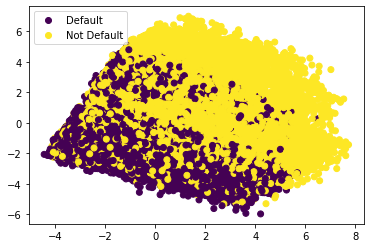

In [205]:
from sklearn.decomposition import PCA
pca = PCA()
Xt_pca = pca.fit_transform(X_train_scale)
plot = plt.scatter(Xt_pca[:,0], Xt_pca[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=['Default','Not Default'])
plt.show()

In [206]:
pca_list = []
for n in range(1, 20):   
    pca = PCA(n_components=n)
    pca.fit(X_train_scale)
    pca_list.append(pd.Series({'n':n, 'pca':pca, 'variance': pca.explained_variance_ratio_.sum()}))
pd.concat(pca_list, axis=1).T.set_index('n')


,pca,variance
n,,
1,PCA(n_components=1),0.193101
2,PCA(n_components=2),0.359575
3,PCA(n_components=3),0.486139
4,PCA(n_components=4),0.56214
5,PCA(n_components=5),0.62802
6,PCA(n_components=6),0.681076
7,PCA(n_components=7),0.724737
8,PCA(n_components=8),0.766205
9,PCA(n_components=9),0.79974


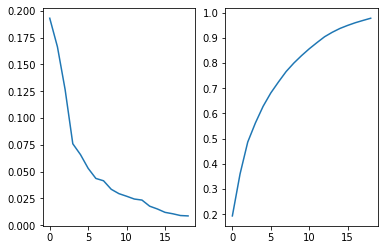

In [207]:
plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_)  
plt.subplot(1,2,2)  
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [213]:
pca = PCA(n_components=5)
pca.fit(X_train_scale)
X_train_pca=pca.transform(X_train_scale)
col_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca = pd.DataFrame(X_train_pca, columns=col_names)
X_train_pca
        
        

,PC1,PC2,PC3,PC4,PC5
0,-1.207688,-0.231355,-0.661021,-1.183295,-0.893958
1,-1.019875,2.248378,2.970958,-1.144886,0.236362
2,0.823504,0.978722,-1.870233,-2.053467,1.498400
3,-2.302852,0.458776,1.114604,-0.129175,0.157428
4,3.193483,-1.252088,4.698019,-0.470534,-0.619844
...,...,...,...,...,...
54170,-0.466423,2.233225,1.406417,-2.018124,0.775334
54171,0.210023,1.317244,1.340408,0.390101,0.252462
54172,1.645567,5.089963,-1.917844,-1.101361,1.669219
54173,-2.624640,-2.034302,0.301592,2.217855,0.726949


In [218]:
X_test_pca=pca.transform(X_test_scale)
col_names = [f"PC{i+1}" for i in range(X_test_pca.shape[1])]
X_test_pca = pd.DataFrame(X_test_pca, columns=col_names)
X_test_pca

,PC1,PC2,PC3,PC4,PC5
0,-3.902293,-1.939151,-0.144807,0.778865,0.033733
1,1.999560,-1.170883,-1.460362,4.486241,0.172704
2,-3.758748,-1.249432,0.315059,0.609299,0.021586
3,-2.162708,2.845537,2.034286,-1.347529,0.497780
4,-3.256140,-1.568175,-0.716180,2.044118,0.921387
...,...,...,...,...,...
23214,-0.782028,1.943375,2.695286,-1.062501,0.488191
23215,-1.829415,0.973644,1.768880,0.827109,2.133081
23216,-1.831230,-0.279845,0.121268,-0.632890,-1.214079
23217,-1.054361,2.269219,2.948857,-1.117781,0.273088


In [219]:
#### model building
log_clf=LogisticRegression()
log_clf.fit(X_train_pca,y_train)
print("traning acc",log_clf.score(X_train_pca,y_train))

traning acc 0.8535856022150439


In [220]:
pred=log_clf.predict(X_test_pca)
accuracy_score(y_test,pred)

0.859511606873681

In [221]:
print(confusion_matrix(y_test,pred))

[[ 9426  1090]
 [ 2172 10531]]


In [223]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85     10516
           1       0.91      0.83      0.87     12703

    accuracy                           0.86     23219
   macro avg       0.86      0.86      0.86     23219
weighted avg       0.86      0.86      0.86     23219



0.9200910758165297


Text(0, 0.5, 'True Positive Rate')

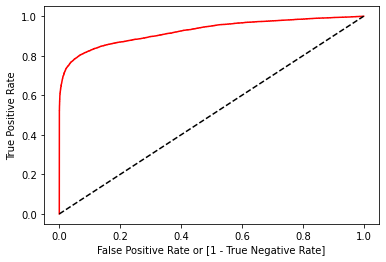

In [231]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, log_clf.predict_proba (X_test_pca)[:,1])

auc = roc_auc_score(y_test,pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [228]:
rf_log=RandomForestClassifier()
rf_log.fit(X_train_pca,y_train)
print("traning acc",rf_log.score(X_train_pca,y_train))
pred=rf_log.predict(X_test_pca)
accuracy_score(y_test,pred)

traning acc 1.0


0.9176967138981007

In [229]:
print(confusion_matrix(y_test,pred))

[[ 9943   573]
 [ 1338 11365]]


In [230]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10516
           1       0.95      0.89      0.92     12703

    accuracy                           0.92     23219
   macro avg       0.92      0.92      0.92     23219
weighted avg       0.92      0.92      0.92     23219



0.9200910758165297


Text(0, 0.5, 'True Positive Rate')

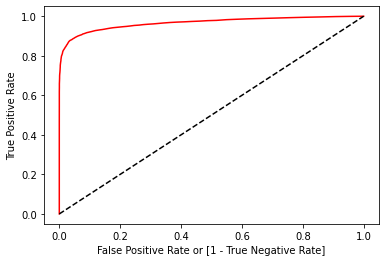

In [232]:
fpr, tpr, thresholds = roc_curve(y_test, rf_log.predict_proba (X_test_pca)[:,1])

auc = roc_auc_score(y_test,pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [234]:
grid={
    "n_estimators":[100,200],
# Maximum number of levels in tree
"max_depth":[2,4,6,8,10,12,14,16],
# max_depth.append(None)
# Minimum number of samples required to split a node
"min_samples_split":[2, 5, 10, 15, 100],
# Minimum number of samples required at each leaf node
"min_samples_leaf":[1, 2, 5, 10]
    
}

In [237]:
from sklearn.model_selection import RandomizedSearchCV

In [240]:
RS=RandomizedSearchCV(rf_log,grid,cv=3,scoring="accuracy")

In [242]:
RS.fit(X_train_pca,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200]},
                   scoring='accuracy')

In [243]:
RS.best_score_

0.9055837337934994

In [244]:
RS.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 14}

In [246]:
rf_log=RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=5,max_depth=14)
rf_log.fit(X_train_pca,y_train)
print("traning acc",rf_log.score(X_train_pca,y_train))
pred=rf_log.predict(X_test_pca)
accuracy_score(y_test,pred)

traning acc 0.9426672819566221


0.9096429648132994

In [247]:
import pickle

In [248]:
pickle.dump(rf_log,open("model.pkl","wb"))

In [255]:
#### prediction

rf_log=pickle.load(open("model.pkl","rb"))

test_input=np.array([1.30277466,  1.8542083 , -0.86352048, -0.78527135, -0.7843899]).reshape(1,5)
prediction=rf_log.predict(test_input)
prediction

array([1])